<a href="https://colab.research.google.com/github/imarshadd/almabetter/blob/master/Email_Campaign_Effectiveness_Prediction_module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name    - Email Campaign Effectiveness Prediction



##### <font size='5px'>**Project Type**    - **Supervised ML Classification**
##### **Contribution**    - Individual

# **Project Summary -**

The goal of this project is to create a machine learning model that can characterize and track emails sent through Gmail-based email marketing campaigns. This model will be used by small to medium business owners who are looking to improve the effectiveness of their email marketing efforts and increase customer retention.

One of the main challenges in email marketing is determining which emails are being read, ignored, or acknowledged by the reader. By understanding which emails are most effective at engaging the reader, business owners can tailor their marketing efforts and increase their chances of success.

To address this problem, we will gather data on a variety of email characteristics, including the subject line, sender name, email content, email format, and email frequency. We will also consider the target audience of the emails and any other relevant factors.

Using this data, we will train a machine learning model to predict whether an email is likely to be read, ignored, or acknowledged by the reader. This model will be able to analyze new emails and provide a prediction of how they are likely to be received by the reader.

To evaluate the performance of the model, we will split our data into a training set and a testing set. We will use the training set to fit the model and the testing set to evaluate its performance. We will use a variety of metrics, such as precision, recall, and F1 score, to assess the model's accuracy and effectiveness.

Once the model is trained and evaluated, it can be deployed in a production environment to help small to medium business owners improve the effectiveness of their email marketing campaigns. By using the model to characterize and track emails, they will be able to make more informed decisions about how to target their marketing efforts and increase customer retention.

Overall, this project aims to provide small to medium business owners with a powerful tool for improving the effectiveness of their email marketing campaigns. By using machine learning to characterize and track emails, they will be able to make more informed decisions and increase the chances of success for their marketing efforts.

# **GitHub Link -**
https://github.com/imarshadd/almabetter/blob/master/Email_Campaign_Effectiveness_Prediction_module_6.ipynb

Small to medium business owners are using Gmail-based email marketing strategies to convert prospective customers into leads, but they are unable to track which emails are being ignored, read, or acknowledged by the reader. They want to create a machine learning model to help characterize and track these emails. The main objective is to improve the effectiveness of their email marketing efforts and increase customer retention.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
# from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn


### Dataset Loading

In [ ]:
# Load Dataset
path  = '/content/data_email_campaign.csv'
email_df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


### Dataset Rows & Columns count

In [ ]:

# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation: {email_df.shape[0]} and feature: {email_df.shape[1]}')

Total observation: 68353 and feature: 12


### Dataset Information

In [ ]:
# Dataset Info
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {email_df.duplicated().value_counts()}, unique values with {len(email_df[email_df.duplicated()])} duplication")

Data is duplicated ? False    68353
Name: count, dtype: int64, unique values with 0 duplication


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
# Missing Value Count Function
def showMissing():
    missing = email_df.columns[email_df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = email_df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = email_df[showMissing()].isnull().sum().sort_values(ascending = False)/len(email_df)*100

missingVal

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45


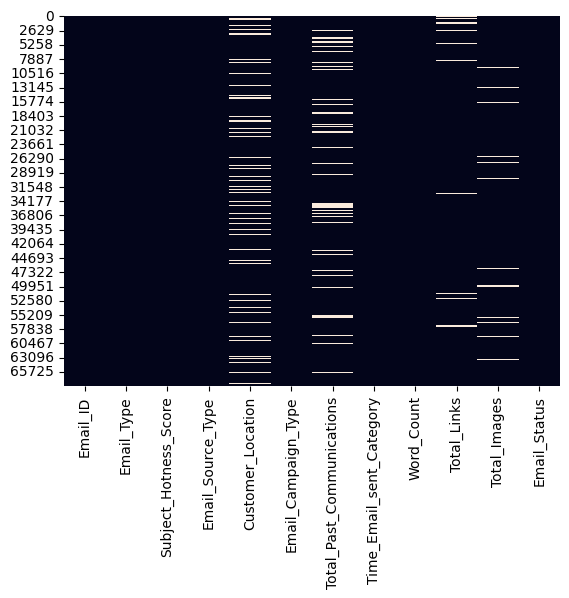

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(email_df.isnull(), cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 observation and 12 features.
* Dataset is a mixture of integer, float and object data type.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location (11595 i.e., 16%), total past communication (6825 i.e., 10%), total link (2201 i.e., 3%), total images (1677 i.e., 2%) has null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features: {email_df.columns.to_list()}')

Features: ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']


In [ ]:
# Dataset Describe
email_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.00,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,68353.00,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,68353.00,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,68353.00,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,61528.00,28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,68353.00,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,68353.00,699.93,271.72,40.00,521.00,694.00,880.00,1316.00
Total_Links,66152.00,10.43,6.38,1.00,6.00,9.00,14.00,49.00
Total_Images,66676.00,3.55,5.60,0.00,0.00,0.00,5.00,45.00
Email_Status,68353.00,0.23,0.50,0.00,0.00,0.00,0.00,2.00


### Variables Description

**Attribute Information ▶**

---
* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in email_df.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, email_df[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = email_df.copy()
# Checking Shape of Email Read
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [ ]:
# Email Status groupby Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [ ]:
# Email Status groupby Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [ ]:
# Email Status groupby Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [ ]:
# Email Status groupby Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [ ]:
# Email Status groupby Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [ ]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
#creating variable to store categorial features
cat_feature = [feature for feature in df.columns.to_list() if feature not in num_feature]
cat_feature

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [ ]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [ ]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [ ]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [ ]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [ ]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,1154.00,0.49,0.20
Total_Past_Communications,79818.00,37.60,40.00
Total_Links,24037.00,10.47,9.00
Total_Images,8547.00,3.69,0.00
Word_Count,1472720.00,620.62,610.00


In [ ]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,10018.10,0.91,0.30
Total_Past_Communications,345204.00,34.71,36.00
Total_Links,105294.00,9.85,9.00
Total_Images,34296.00,3.19,0.00
Word_Count,6523382.00,590.94,578.00


In [ ]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,63707.30,1.16,1.00
Total_Past_Communications,1355183.00,27.40,26.00
Total_Links,560603.00,10.54,9.00
Total_Images,193902.00,3.62,0.00
Word_Count,39846333.00,725.26,713.00


In [ ]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [ ]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [ ]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [ ]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
engagement_rate

3.4716837593082963

In [ ]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
open_rate

19.62166986086931

In [ ]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
ignored_rate

80.3783301391307

In [ ]:
# function to calculate engagement rate, open rate and ignored rate
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [ ]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('='*120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64

In [ ]:
# Link-to-Word ratio
df_Link_to_Word_ratio = df['Total_Links'] / df['Word_Count']

# Image-to-Word ratio
df_Image_to_Word_ratio = df['Total_Images'] / df['Word_Count']

# Image-Link-Word ratio
df_Image_Link_Word_ratio = df['Total_Images'] + df['Total_Links'] / df['Word_Count']

# Percentage of words that are links
df_Percentage_of_words_that_are_links = (df['Total_Links'] / df['Word_Count'])*100

# Number of Images per link
df_Number_of_Images_per_link = df['Total_Images'] / df['Total_Links']

# Calculating the weighted sum of Subject_Hotness_Score and Total_Past_Communications
df_Hotness_Score = df['Subject_Hotness_Score'] * df['Total_Past_Communications']

In [ ]:
# Image-Link-Word ratio
df_Image_Link_Word_ratio.mean()

3.56208687250181

In [ ]:
# Image-to-Word ratio
df_Image_to_Word_ratio.mean()

0.006425172246013729

In [ ]:
#Link_to_Word_ratio
df_Link_to_Word_ratio.mean()

0.019561519413416703

In [ ]:
#Percentage_of_words_that_are_links
df_Percentage_of_words_that_are_links.mean()

1.9561519413416701

In [ ]:
# Number of Images per link
df_Number_of_Images_per_link.mean()

0.24534715873562615

In [ ]:
#Hotness score
df_Hotness_Score.mean()

26.159572877389156

### What all manipulations have you done and insights you found?

In order to understand email campaign effectiveness, i first started analysis by understanding what percentage of email show customer engagement and bounce or ignore rate.
> * No. of Email Read : - 11039 i.e., 17%
> * No. of Email Acknowledged : - 2373 i.e., 3%
> * No. of Email Ignored : - 54941 i.e., 80%

This result shows that maximum of the emails were ignored, therefore to learn exactly why it was ignore, I tried several grouping of categorial features to better understand the relationship. Then entire result was also being judged by the email status to know exact enagement.

I have also checked the rate how emails were opened, ignored or acknowledeged for each categorial variable. Then also calculated link, image density with respect to total word count. Again using the link and image calculated percentage of each with respect to wordcount. Finally combined subject hotness score and total past communication to calculate the combined weight.

The analysis shows that in order to get emails acknowledged, email should have an average of atleast 37 total communication which is relatively more than those of ignored emails, this shows that emails are acknowledged based on interaction. Other features like word count showed that word count of average 590-600 are acknowledged and it should also contains atmost 10 links and 3 image.

Email type 1 with source 2 location c email campaign type 1 when sent on morning showed effective email with high acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Continous Variables - Distplot

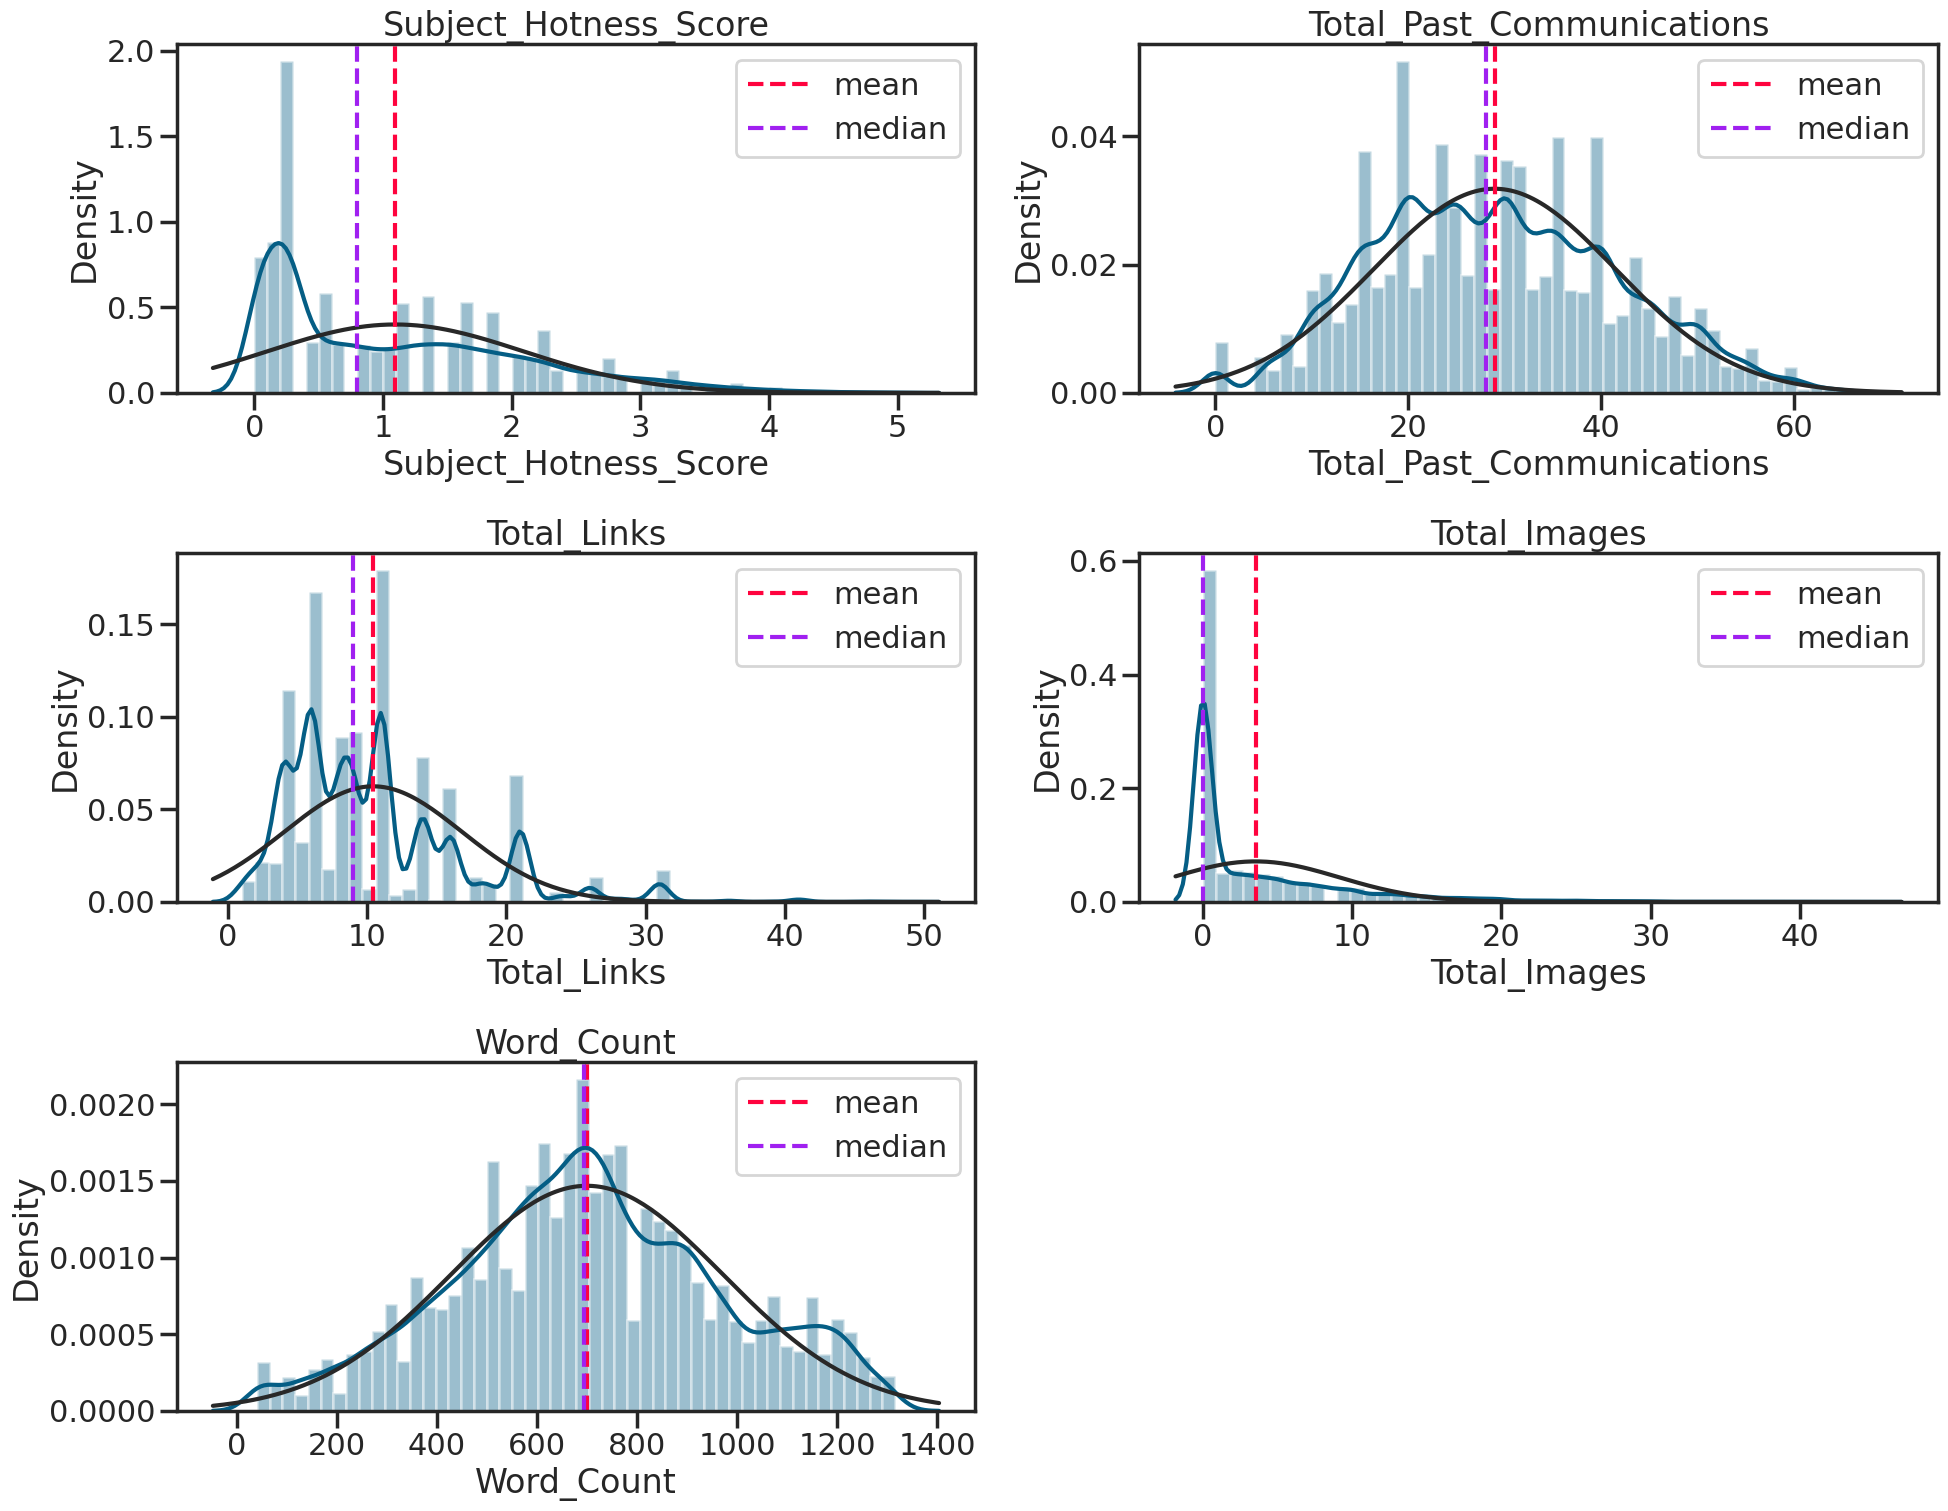

In [ ]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (20,30))
for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

Distplot drawn above is a combination of both histogram and KDE plot, it is best for plotting continous variable and understanding the distribution.

##### 2. What is/are the insight(s) found from the chart?

Subject hotness score, total image and total links are positively skewed whereas wordcount and total comunication count show somewhat normal distribution.

* Subject hotness score has an average of value 1
* Total communication has an average of value 30
* Toal links has an average value of 10
* Total image has an average value of 3
* Word count has an average value of 700


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot was drawn to understand distribution of each variable which eventually will help in building model and treating with null values or outliers, however it helps how each values plays important role in creating an effective email campaign.

Standalone this plot is not sufficient to predict negative growth.

###Effect of Email Type
Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 2 Enagement Based on Email Type

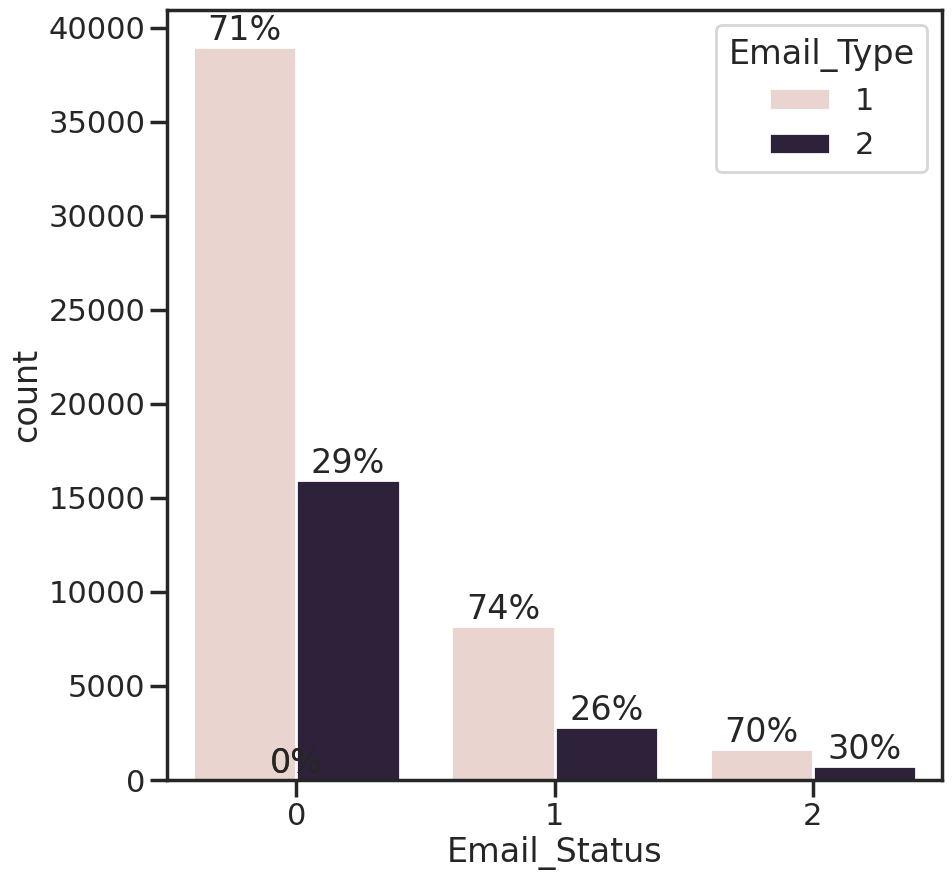

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

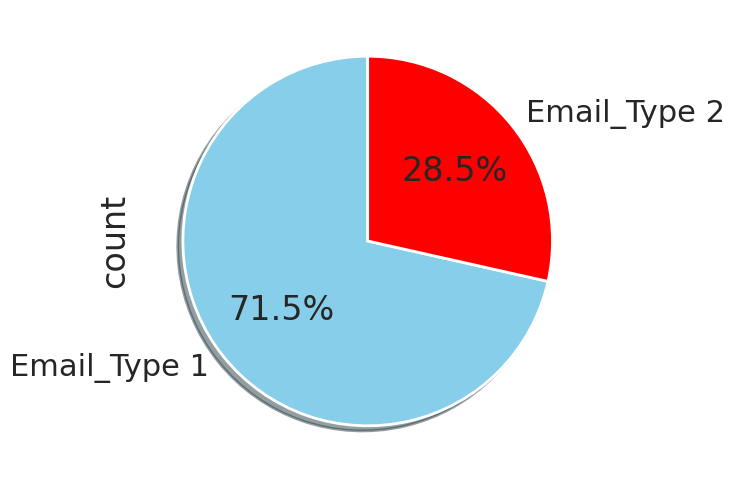

In [ ]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Count plot helps in learning more about the count of indivdual categories.

Pie plot helps in understanding the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

Number of emails ignored is way more than emails that are acknowledged overall.

Overall 71% emails are of type 1, out of which 71% emails are ignored i.e., so only 29% of type 1 showed open rate.
Similarly 29% emails are of type 2, out of which 29% percent are ignored i.e., 71% of type 2 showed open rate.

Type 2 show more promising result even though sent in less volume, it show more emails were acknowledged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps in understanding how emails are being engaged, even though it helped but this graph was incapable to produce any business impact other than visualizing the curiosity of engagement.

#### Chart - 3 Engagement based on Email Type with all numerical features

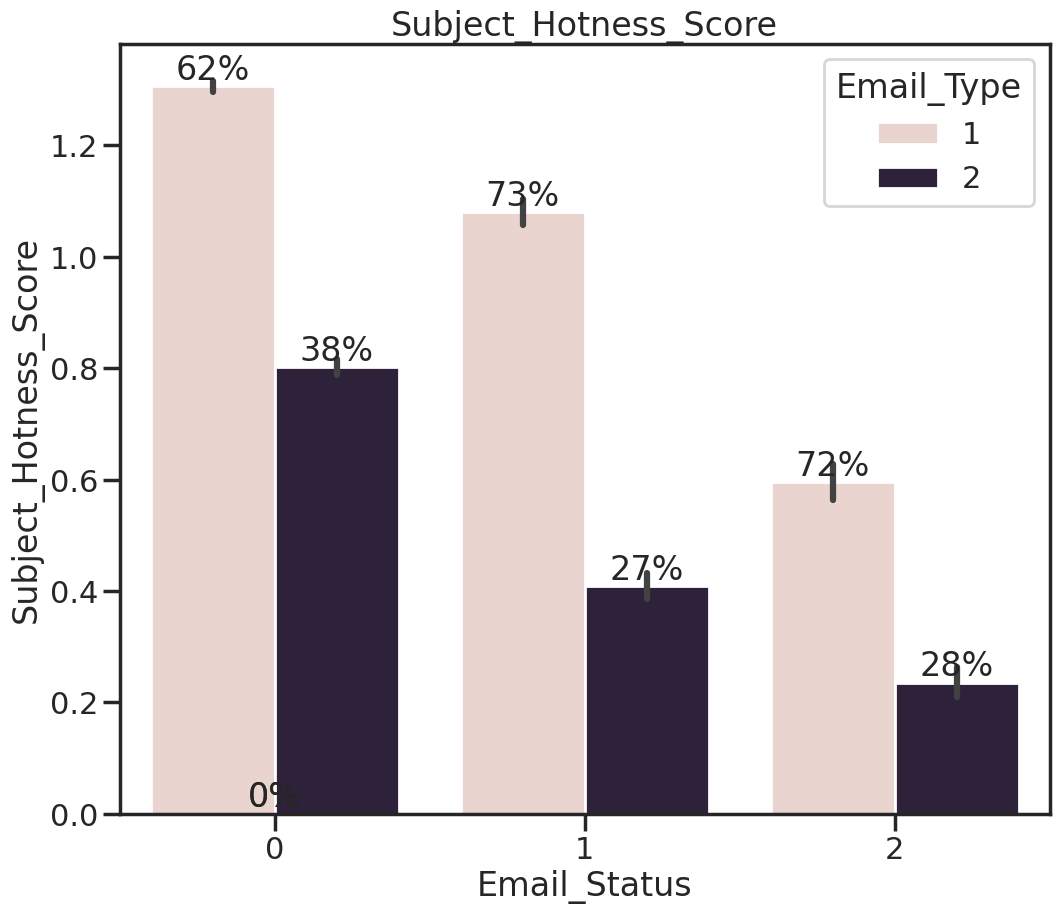

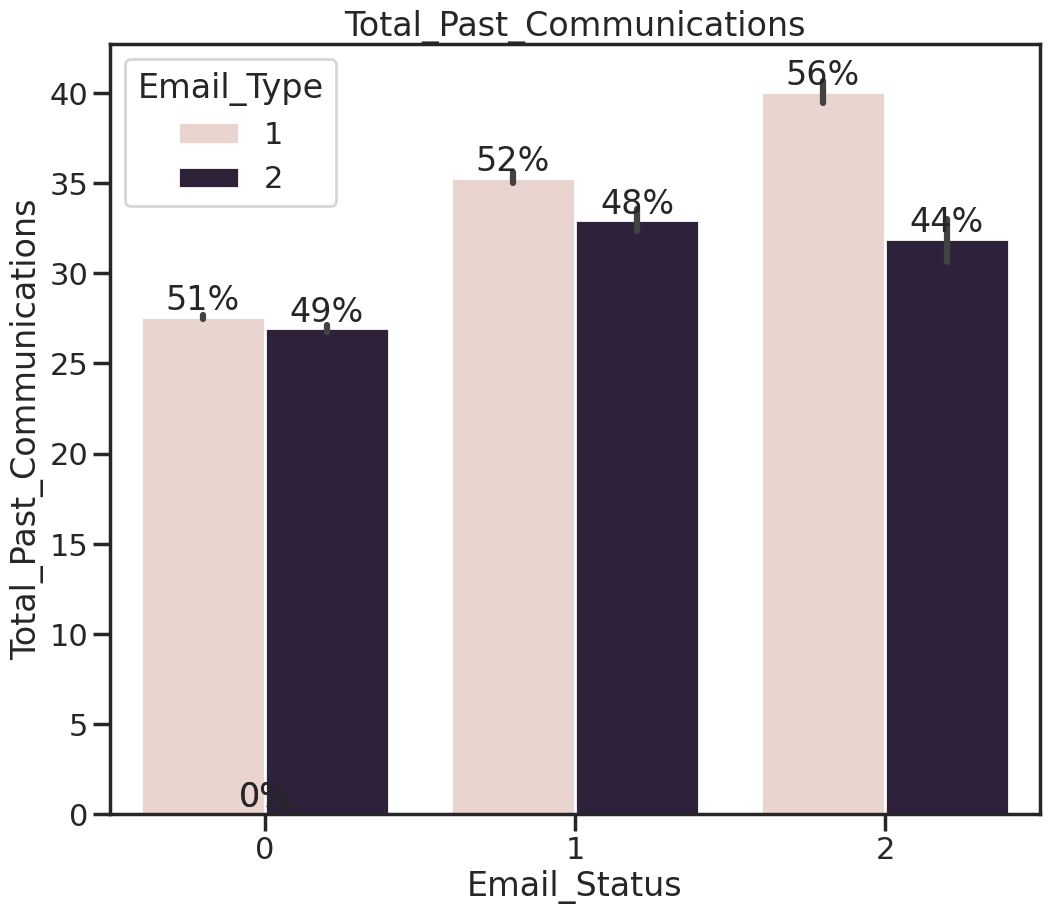

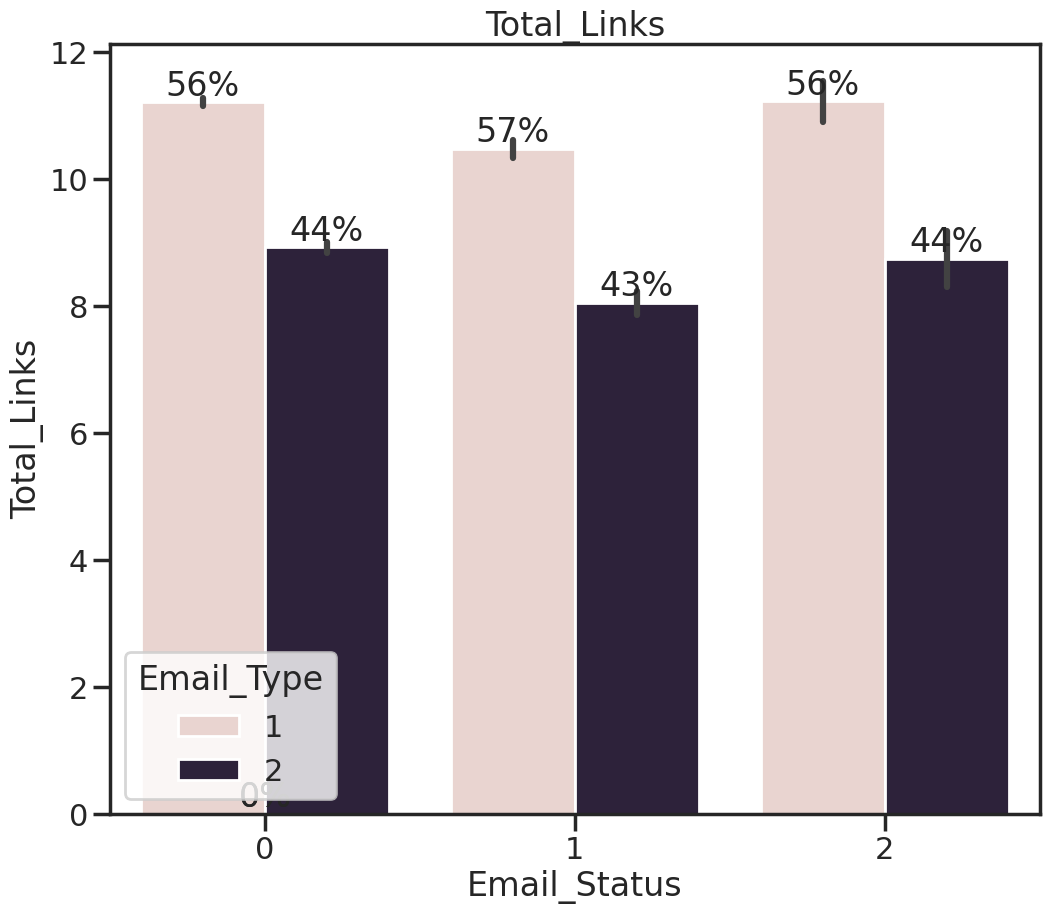

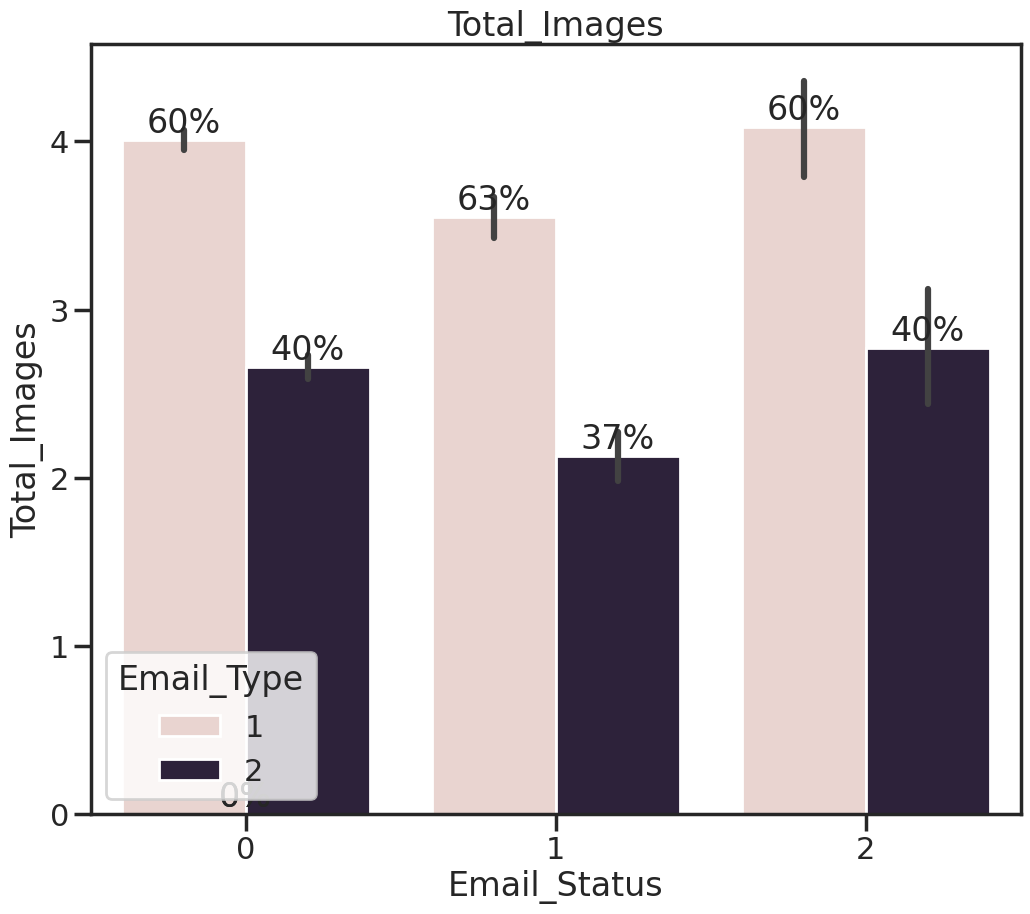

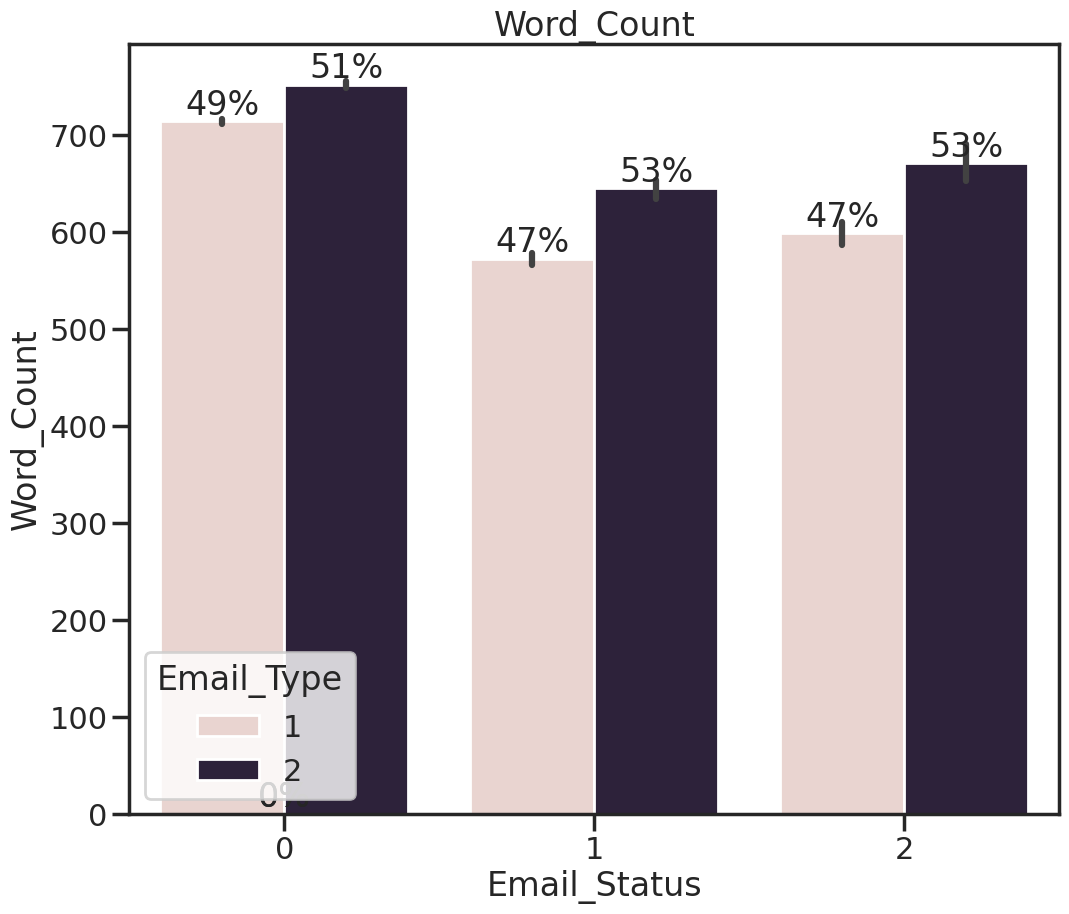

In [ ]:
# Chart - 3 visualization code

for value in num_feature:
  plt.figure(figsize = (12,10))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Email_Type');
  unique = len([x for x in df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  # plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data.
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email type with respect to Email status, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

As from the previous chart, it was shown that even though email sent for type 1 was more and ignored rate was also high for the same i.e., type 2 being sent on less volume show good enagement rate.

From this present graph it is clear that past communication has to be more for better enagement alongwith average of word count 600 with subject hotness score of 0.6 and content having link of average 10 and 3 image gives good result.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing emails are generally more ignored than important notices, and communication is important therefore email which are sent should be where people can talk back instead of just sending it from no reply email id plus if emails are sent in the form of notices, it show more enagement.

Click through rate for marketing or conversion rate is low are marketing emails are ignored most of the time which may lead to negative growth if email marketing is the core for scaling of business or in generating revenue.

###Effect of Email Campaign Type

#### Chart - 4 Email Campaign Type

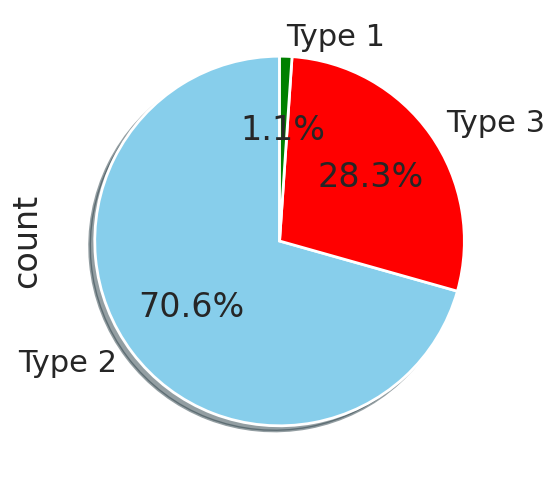

In [ ]:
# Chart - 4 visualization code
#pie chart for distribution of each email campaign type
df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                               colors=['skyblue','red','green'],
                               explode=[0,0,0]
                              );

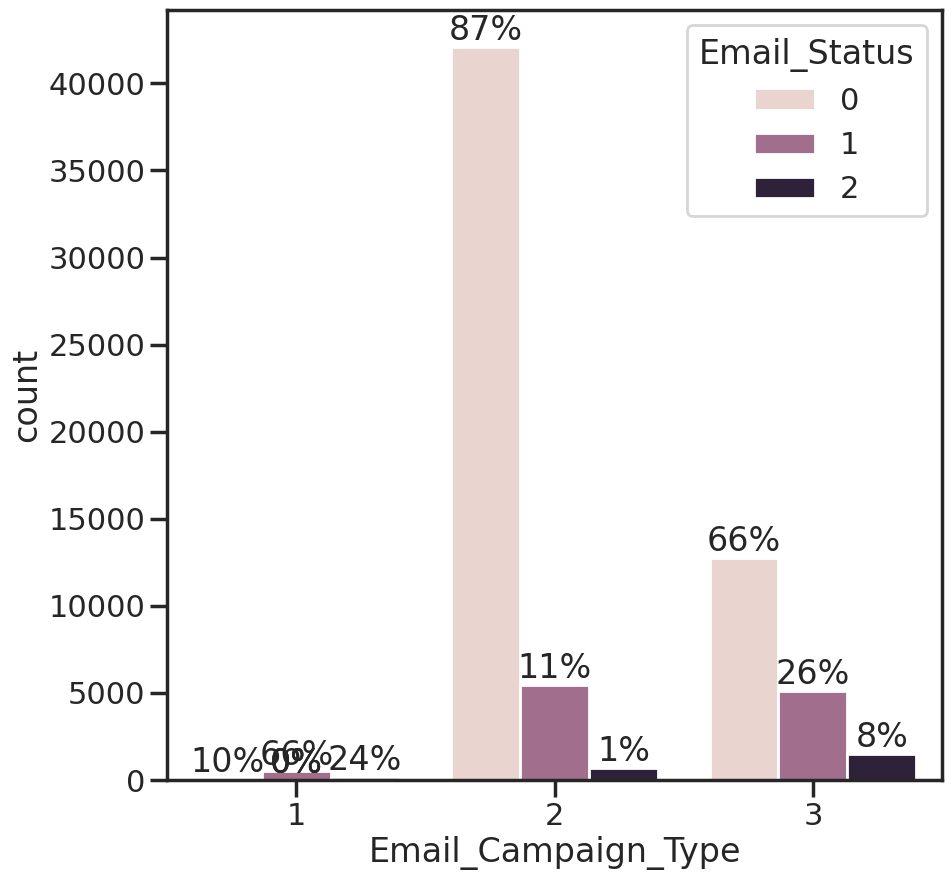

In [ ]:
#bar plot for understanding how email status is affected by campign type
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'])
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart.

Pie chart show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Email campaign 1, even though has very small quantity but open rate for those email are way more than others.

Email campaign type 2 show most of the emails as ignored and only 1% of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and stop campaign 2 as its most of the emails are ignored.

If emails are ignored in huge number, its better to stop that category and make sure to use a/b test with the content and other category before sending in bulk as it will only cost loss of revenue.

###Effect of Location

#### Chart - 5 Location with most Email Acknowledged

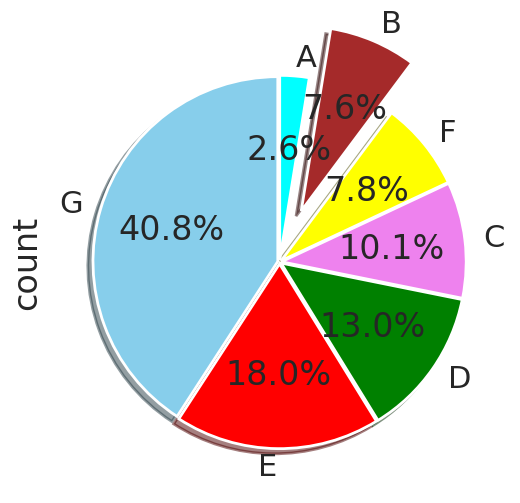

In [ ]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['skyblue','red','green','violet','yellow','brown','cyan','magenta'],
                               explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01]
                              );


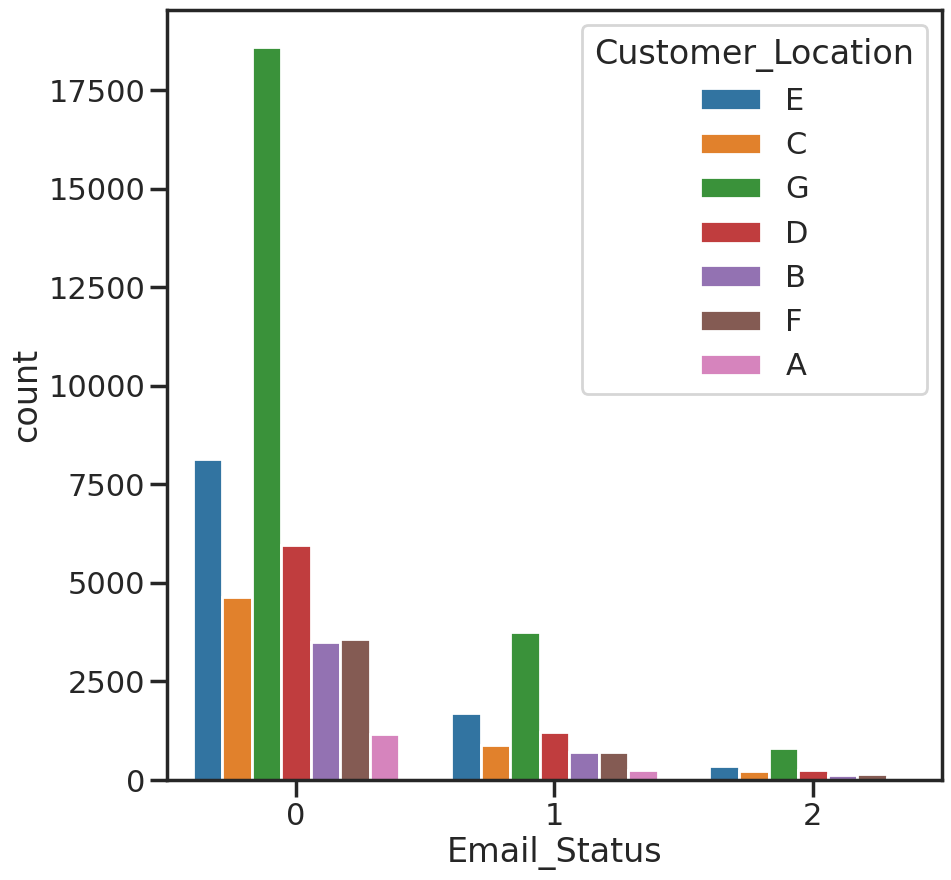

In [ ]:
#based on location identifying how email status changed
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Customer_Location'])
plt.show()

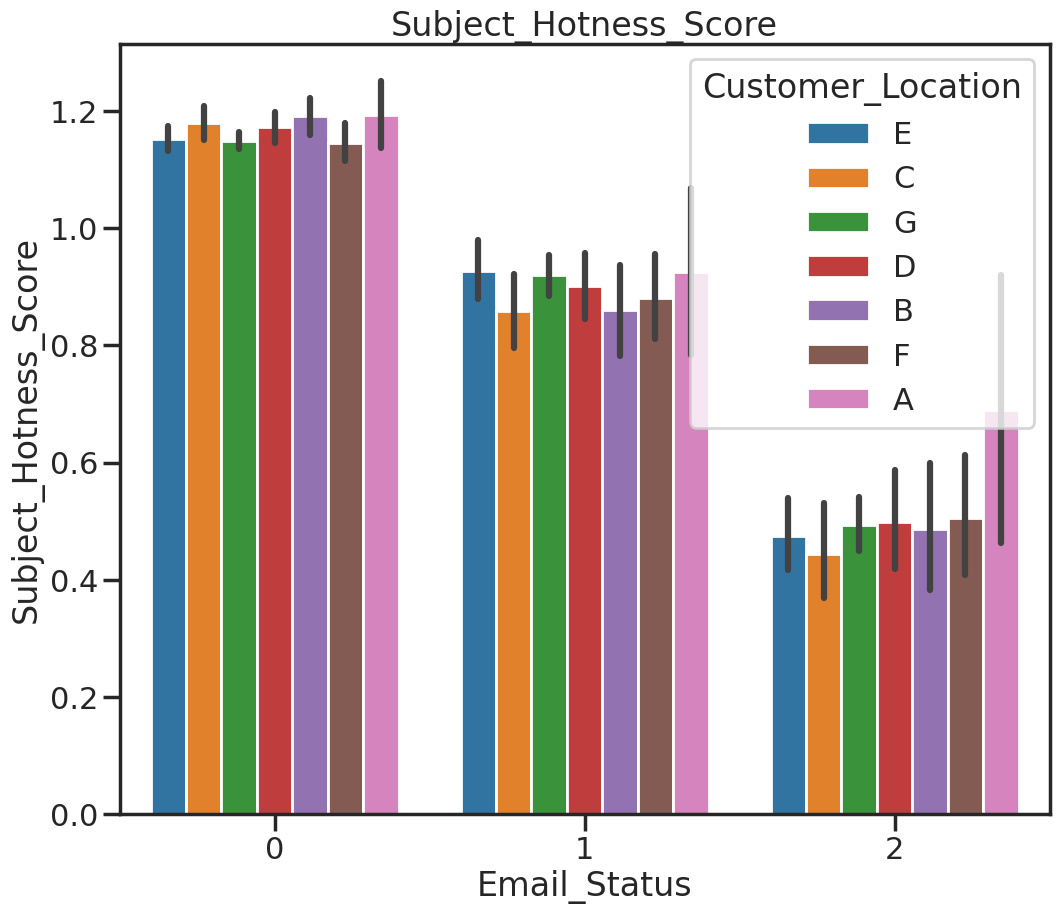

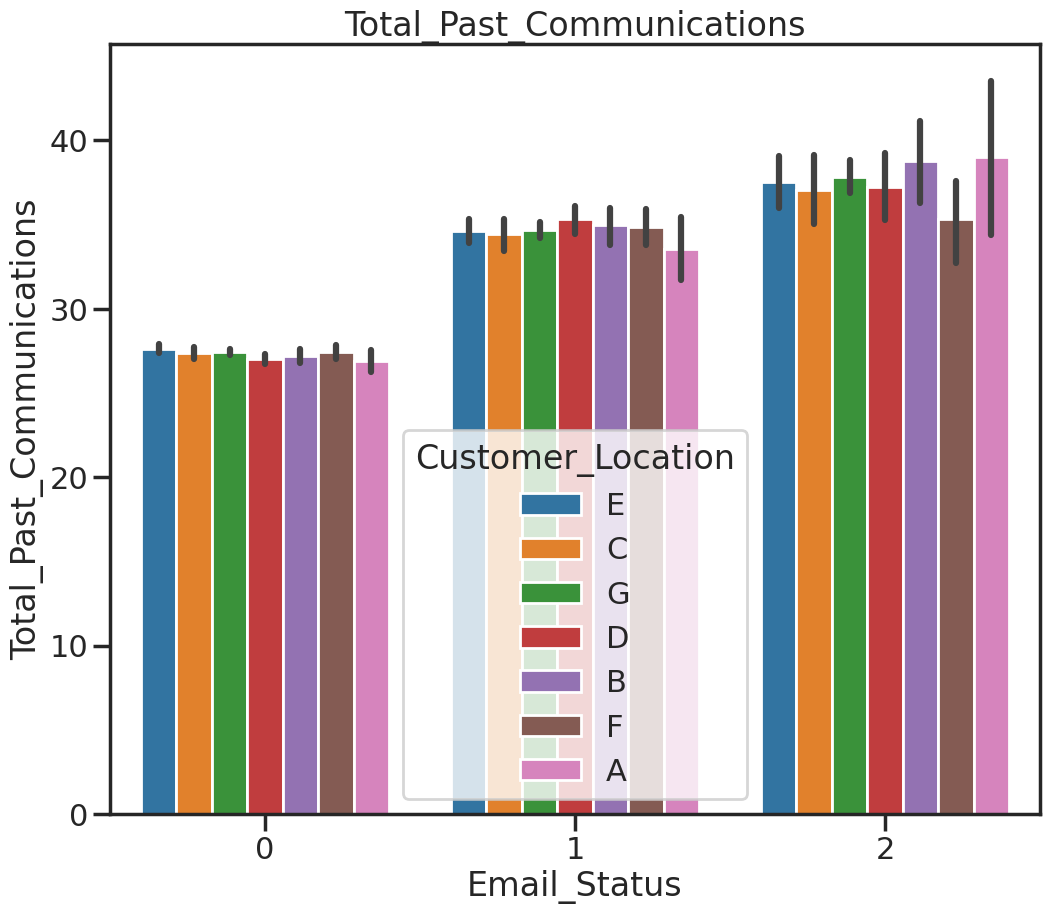

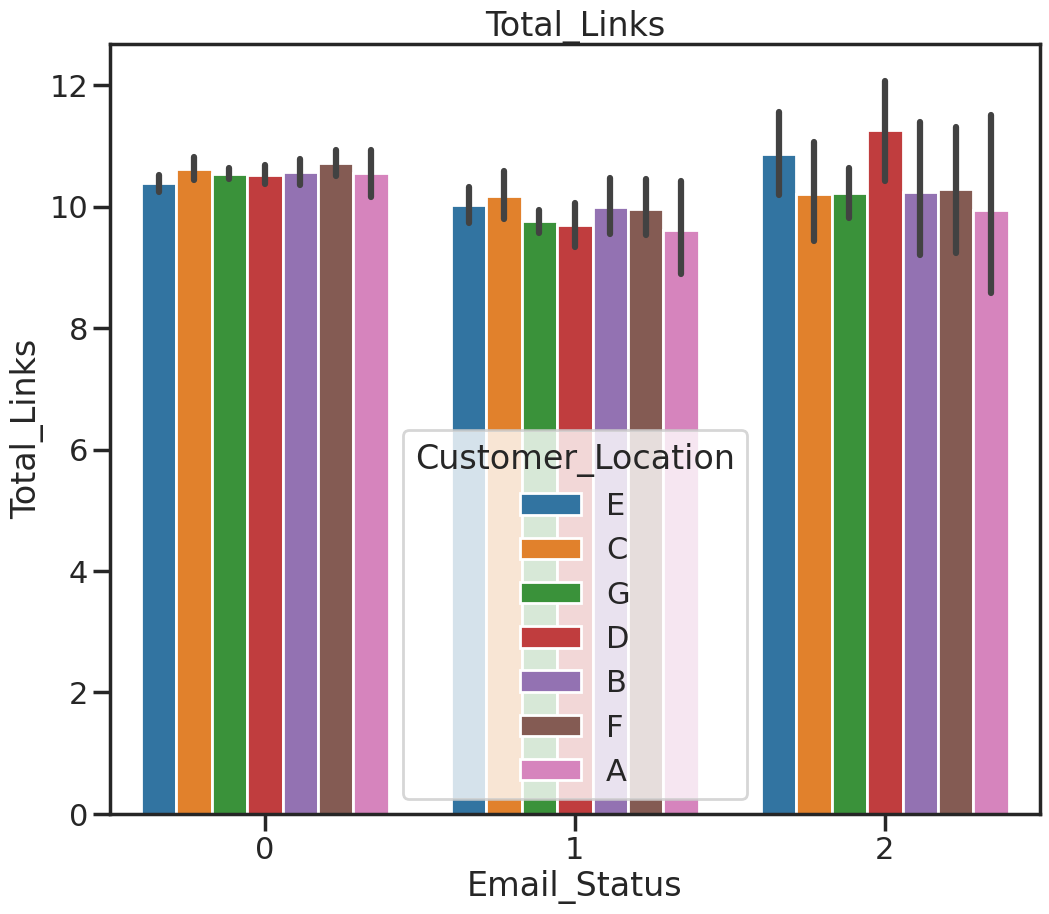

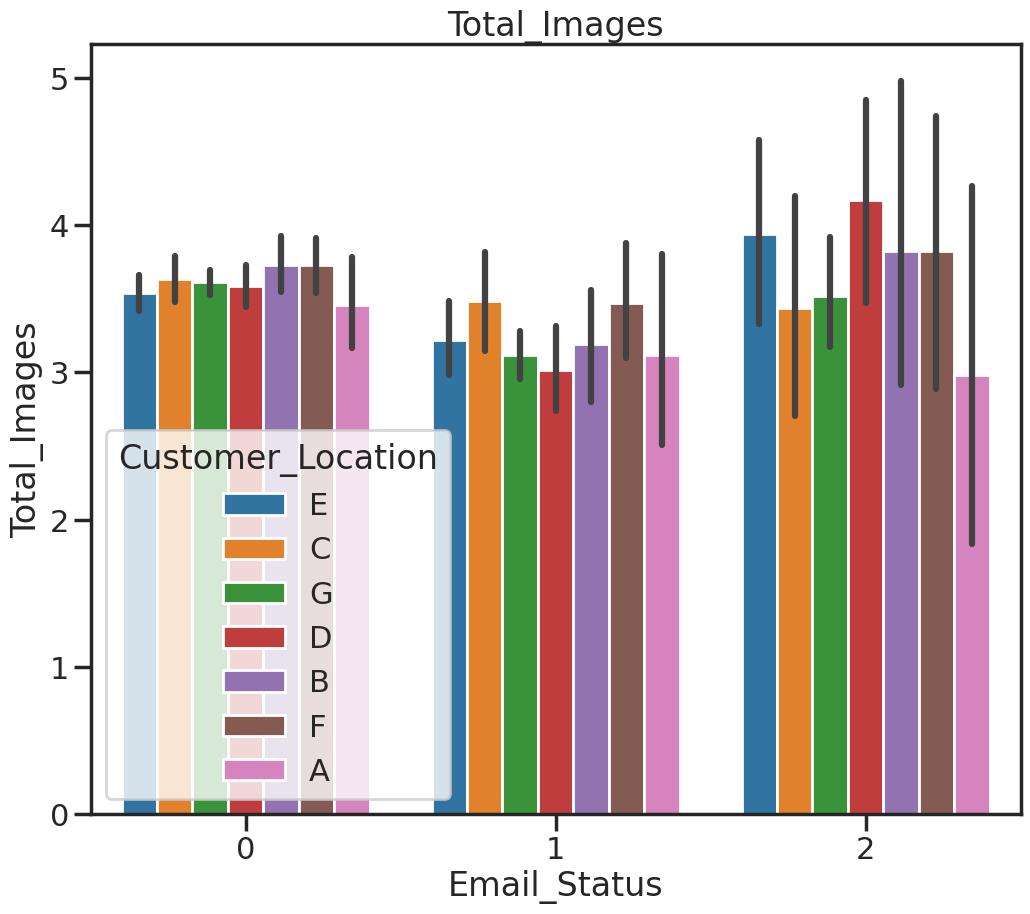

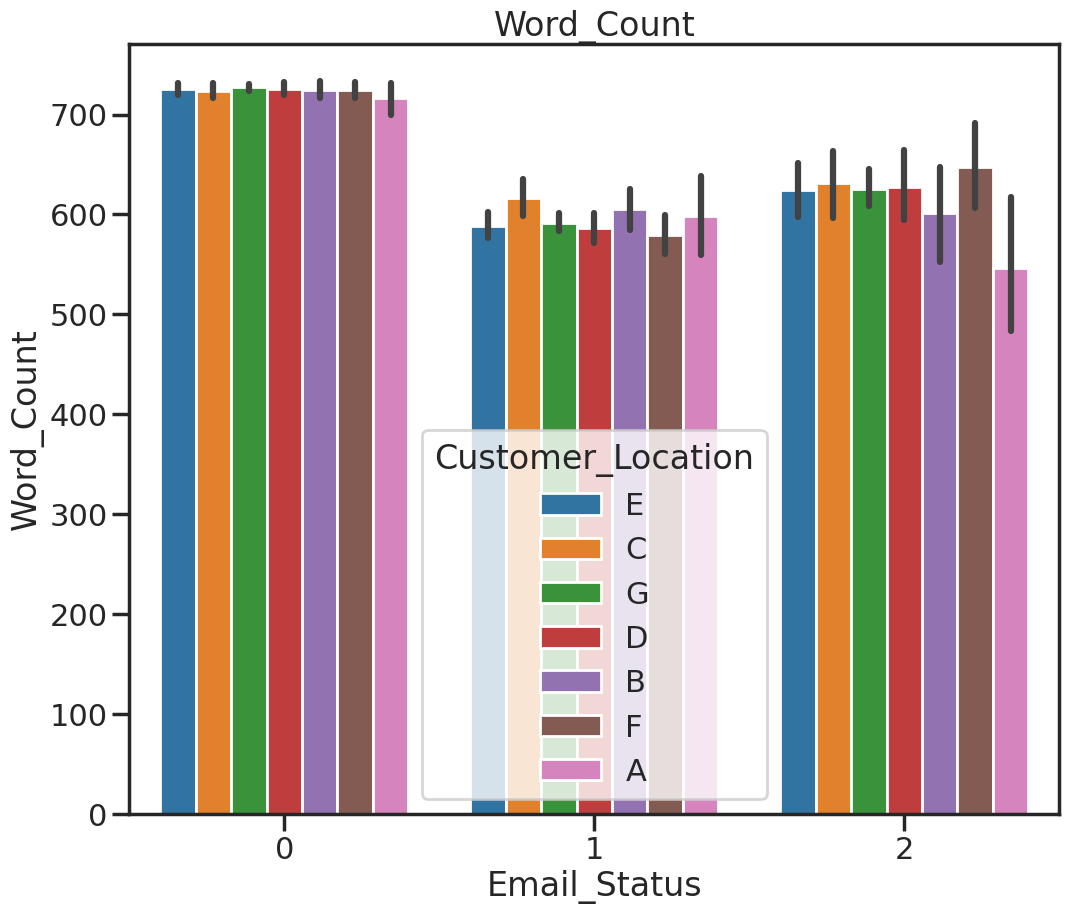

In [ ]:
#checking effect of location on other numerical features
for value in num_feature:
  plt.figure(figsize = (12,10))
  ax = sns.barplot(data = df, x = 'Email_Status',y = value, hue = 'Customer_Location');
  plt.title(value)
  plt.show()
  print('='*120)

##### 1. Why did you pick the specific chart?

Easy to understand and helpful in understanding the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

Location C show maximum number of enagement as very low number of email very sent to this location and for that also, it showed maximum number of communication and emails acknowledged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the location, email should be more sent for location C rather than on location G where most of the emails are ignored and very less emails are acknowledged.

May be customer location G had more potential but it coversion rate is lower which may cause extra loss of revenue.

###Effect of Time Email was sent

#### Chart - 6

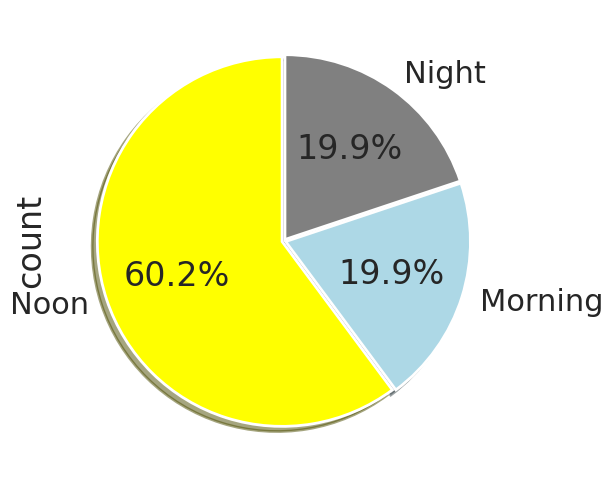

In [ ]:
# Chart - 6 visualization code
#pie chart for distribution of email based on time period
df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['yellow','lightblue','grey'],
                               explode=[0.01,0.01,0.01]
                              );

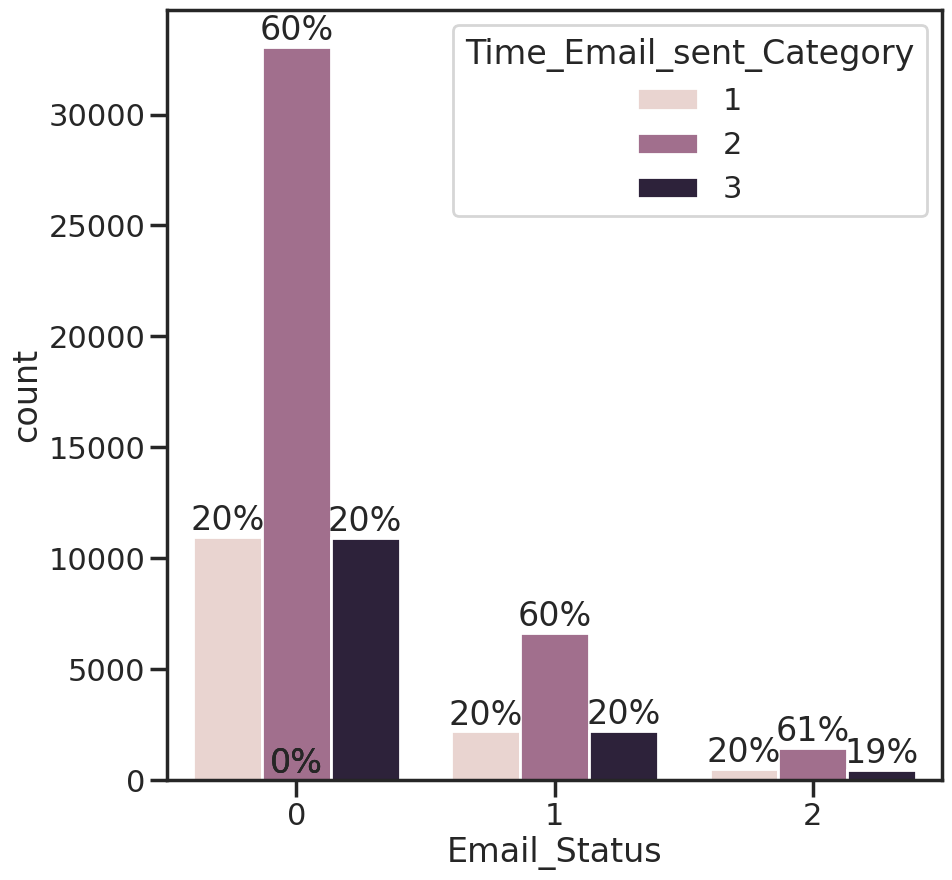

In [ ]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Pie chart helps in learning the distribution whereas count plot helped in understanding the effect of time period on how emails were treated.

##### 2. What is/are the insight(s) found from the chart?

60% of the emails were sent during afternoon, out which 60% is being ignored i.e., for the remaining 40% only 60% showed opened rate.

Since email sent in morning and night has equal percentage, overal email sent during these time are more acknowledged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The Email_Type of the campaign will not have any significant impact on the Email_Status.
* The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications.
* The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email.

### Hypothetical Statement - 1
---
The Email_Type of the campaign will not have any significant impact on the Email_Status


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used chi-square test of independence which is a statistical test to determine if there is a significant association between two categorical variables. In this case, the two variables are Email_Type and Email_Status.

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

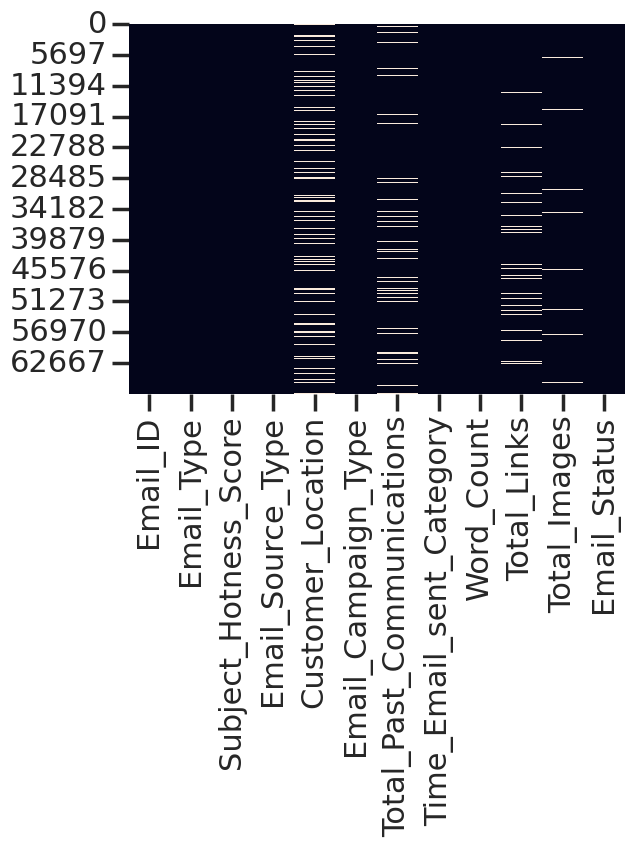

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False);

In [ ]:
#getting missing value count using the funciton created earlier
missingVal

,Missing Data Count,Missing Data Percentage
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45


* Since customer location is categorial value and there is no possible way to identify what this null value could be, therefore trying to replace null values using mode since mode is best way to replace categorial value.

In [ ]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

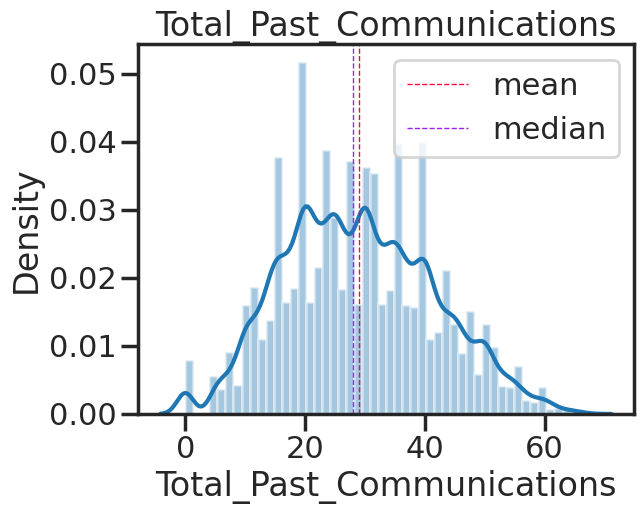

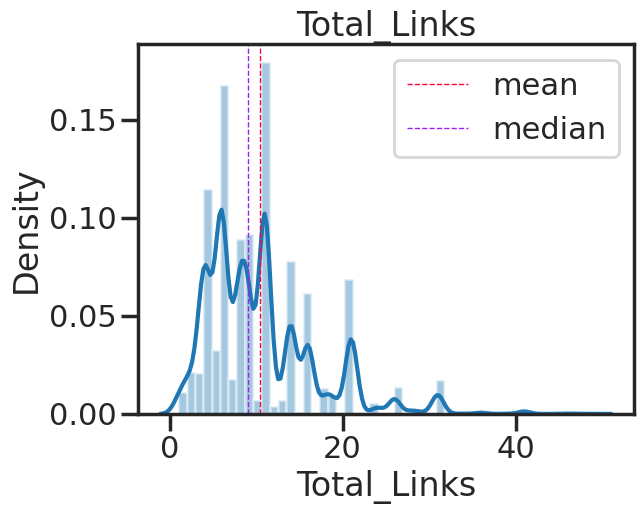

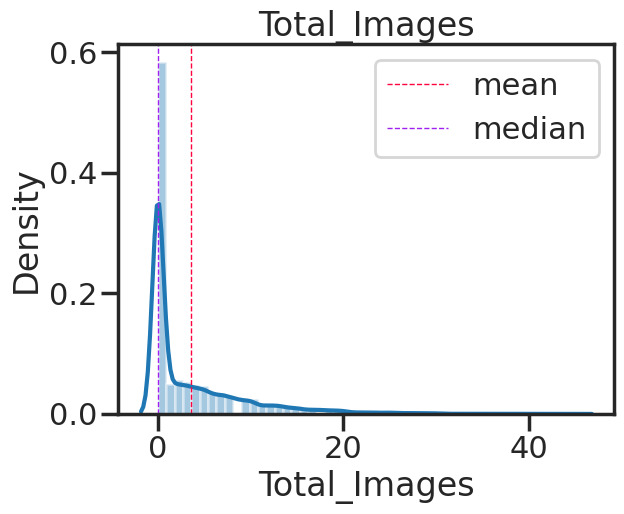

In [ ]:
#checking distribution of other null value to find correct way to impute
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
  sns.distplot(x=df[cat], hist= True);
  feature = df[cat]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.title(f'{cat.title()}');
  plt.xlabel(cat)
  plt.show()
  print('='*120)

* Since only total past communication show almost normal distribution and other two show right skew, hence using mean for total communication and for other using median since it is most robust to outliers.

In [ ]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing value imputation techniques deals with replacing the null value using central tendency limit theorem which means that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough.

Since location was categorial data, therefore it was important to replace the values using mode techniques, as their was no possible way to find exactly what those location could be and since it has almost 20% of null value deleting could lead to loss of data therefore I replace it using mode.

For total pas communication which showed normal distribution therefore replaced its null value using mean other two feature, which was continous data and showed right skewness, there was two way to replace those values, either by mode or median. Median however is the best approach for right skew as it get less affected by outliers therefore i choose median to replace the null value.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments in numerical feature
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Links', 'Total_Images', 'Word_Count']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

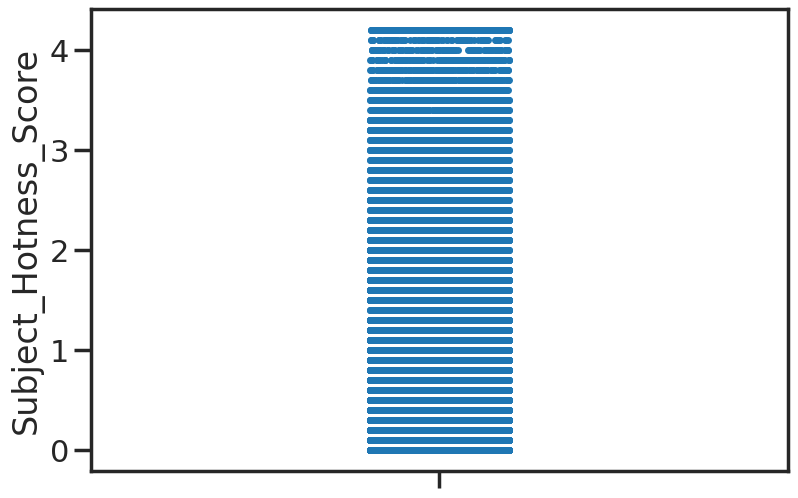

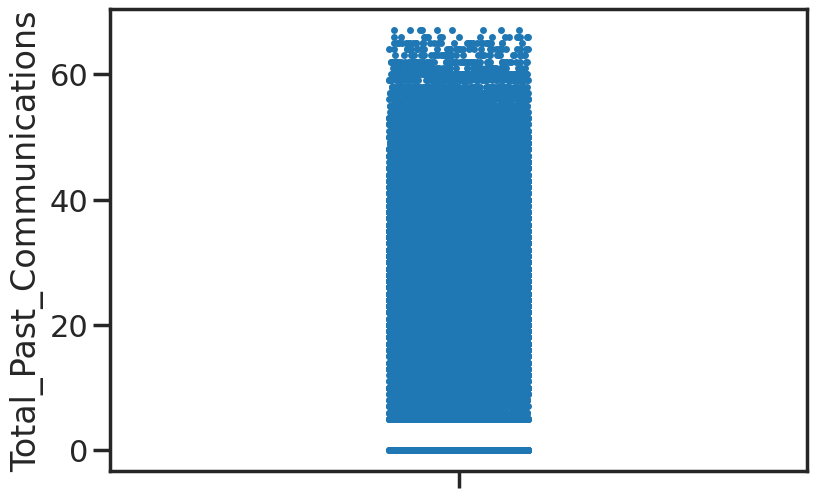

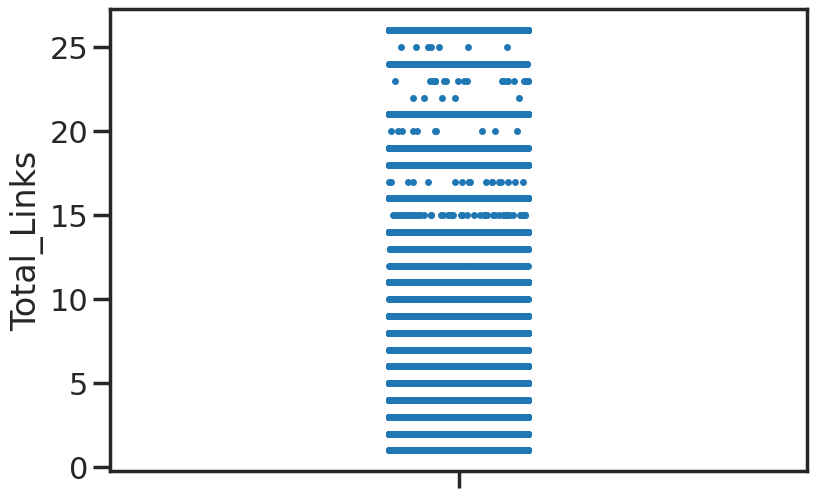

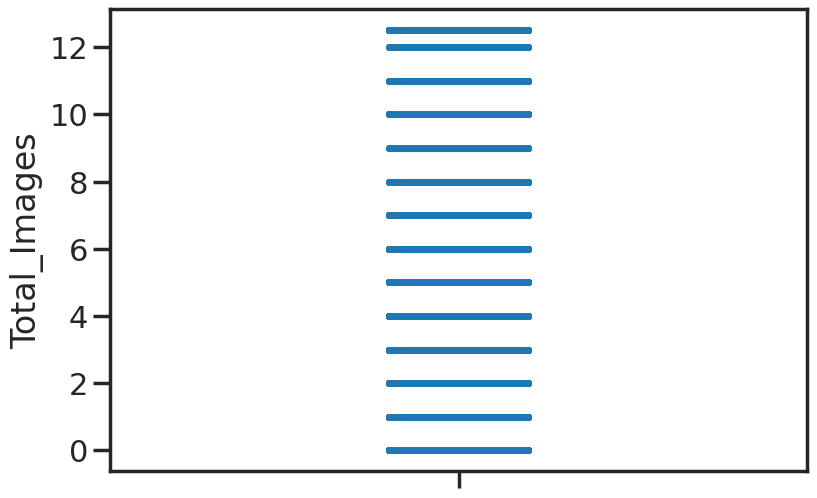

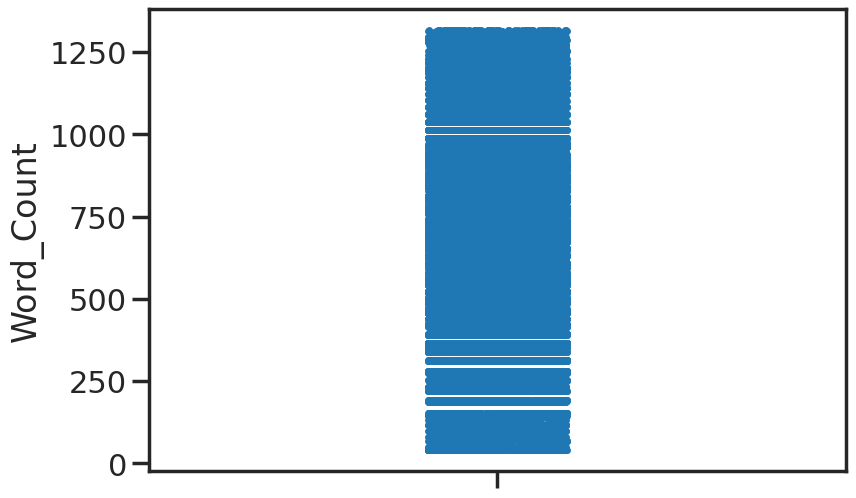

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in num_feature:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])
  plt.show()
  print('='*120)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I choose to remove outliers from the numerical values by first separting them into symmetric and non symmetric. Since there was no symmetric data available, therefore I choose to use capping technique to cap the upper and lower limit value with max and min value instead of just removing them.

### 3. Categorical Encoding

In [ ]:
#creating separate copy for categorial feature
cat_feature_encoding = cat_feature.copy()

In [ ]:
# removing id and dependent variable
cat_feature_encoding.remove('Email_ID')
cat_feature_encoding.remove('Email_Status')

In [ ]:
# checking integer values of feature represent an ordinal relationship
from scipy.stats import chi2_contingency

# create a contingency table
for cat in cat_feature_encoding:
  contingency_table = pd.crosstab(df[cat], df['Email_Status'])

  # calculate the chi-squared statistic and p-value
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(cat)
  # check the p-value
  if p < 0.05:
      print("There is a significant association between the categorical feature and the target variable")
  else:
      print("There is no significant association between the categorical feature and the target variable")
  print('\n')


Email_Type
There is a significant association between the categorical feature and the target variable


Email_Source_Type
There is a significant association between the categorical feature and the target variable


Customer_Location
There is no significant association between the categorical feature and the target variable


Email_Campaign_Type
There is a significant association between the categorical feature and the target variable


Time_Email_sent_Category
There is no significant association between the categorical feature and the target variable




* since location does not show any ordinal relationship its best to use one-hot encoding technique over other binary, count, target and ordinal encoding techniques. Inspite of using one hot encoding on location there may be possibility of causing poor performance in model, therefore keeping or removing the column will be decided completely after trial.

In [ ]:
#creating copy
dff = df.copy()

In [ ]:
# Encode your categorical columns
dff = pd.get_dummies(dff,columns= ['Time_Email_sent_Category','Customer_Location',
                                   'Email_Campaign_Type'], drop_first = True)

In [ ]:
dff.head(1)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_2,Email_Campaign_Type_3
0,EMA00081000034500,1,2.20,2,33.00,440.00,8.00,0.00,0,False,False,False,False,False,True,False,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I have used one hot encoding technique on categorial feature customer location and time email sent category since it does not show any ordinal relation and rest other categorial features already had integer values which show ordinal relation.

Benefit of using one hot encoding:
* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
dff.drop(columns = ['Email_ID'], inplace = True)

In [ ]:
#combining total image and total link to find its percentage in total word count
# Percentage of words that are links+image
dff['Percentage_of_words_that_are_links_image'] = ((dff['Total_Links']+ dff['Total_Images'])/ dff['Word_Count'])*100

In [ ]:
# Total Number of Images and link
dff['Images_per_link'] = dff['Total_Images'] + dff['Total_Links']

In [ ]:
# Number of Images per link
dff['Images_plus_link'] = dff['Total_Images'] / dff['Total_Links']

In [ ]:
#dropping total link and image
dff.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [ ]:
#replacing infinity values with 0
np.isinf(dff).values.sum()
dff.replace([np.inf, -np.inf], 0, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
dff.shape

(68353, 19)

#####Feature selection by removing columns from a dataset that have a low variance

In [ ]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]]
          #var_thres.get_support() return boolean values on checking condition
  if "Email_Status" in concol:
    concol.remove("Email_Status")
  else:
    pass
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [ ]:
# Calling the function
df_removed_var=dropping_constant(dff)

Columns dropped: []


#####Multicolinearity

In [ ]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [ ]:
correlation(df_removed_var,0.6)

['Email_Campaign_Type_2',
 'Time_Email_sent_Category_3',
 'Images_plus_link',
 'Email_Campaign_Type_3']

In [ ]:
#dropping highly correlated values
df_removed=df_removed_var.drop(['Email_Campaign_Type_2','Customer_Location_G','Email_Source_Type'],axis=1)
df_removed.shape

(68353, 16)

In [ ]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Email_Status']]])

,variables,VIF
0,Email_Type,7.11
1,Subject_Hotness_Score,1.92
2,Total_Past_Communications,5.14
3,Word_Count,6.85
4,Percentage_of_words_that_are_links_image,2.31
5,Images_per_link,6.25
6,Images_plus_link,2.69


##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8.

##### Which all features you found important and why?

In [ ]:
#important features
df_removed.columns.to_list()

['Email_Type',
 'Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Email_Status',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Email_Campaign_Type_3',
 'Percentage_of_words_that_are_links_image',
 'Images_per_link',
 'Images_plus_link']

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Email_Status"],axis=1),y=df["Email_Status"])

,Features,Importances
6,Customer_Location_B,0.01
10,Customer_Location_F,0.01
7,Customer_Location_C,0.01
0,Email_Type,0.01
8,Customer_Location_D,0.01
5,Time_Email_sent_Category_3,0.02
9,Customer_Location_E,0.02
4,Time_Email_sent_Category_2,0.02
11,Email_Campaign_Type_3,0.03
14,Images_plus_link,0.07


Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Email_Type', 'Subject_Hotness_Score', 'Word_Count', 'Email_Status', 'Percentage_of_words_that_are_links_image', 'Images_per_link', 'Images_plus_link']


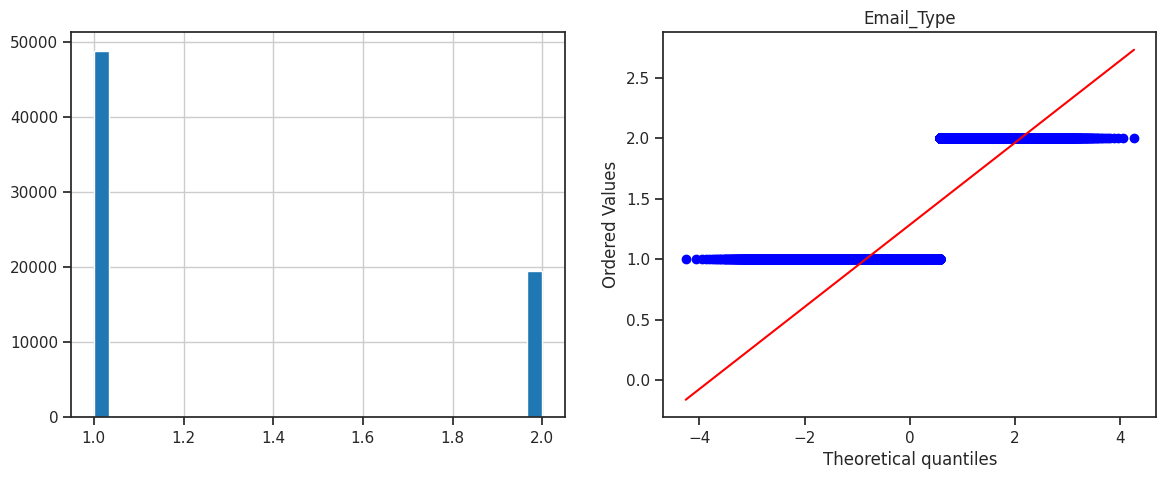

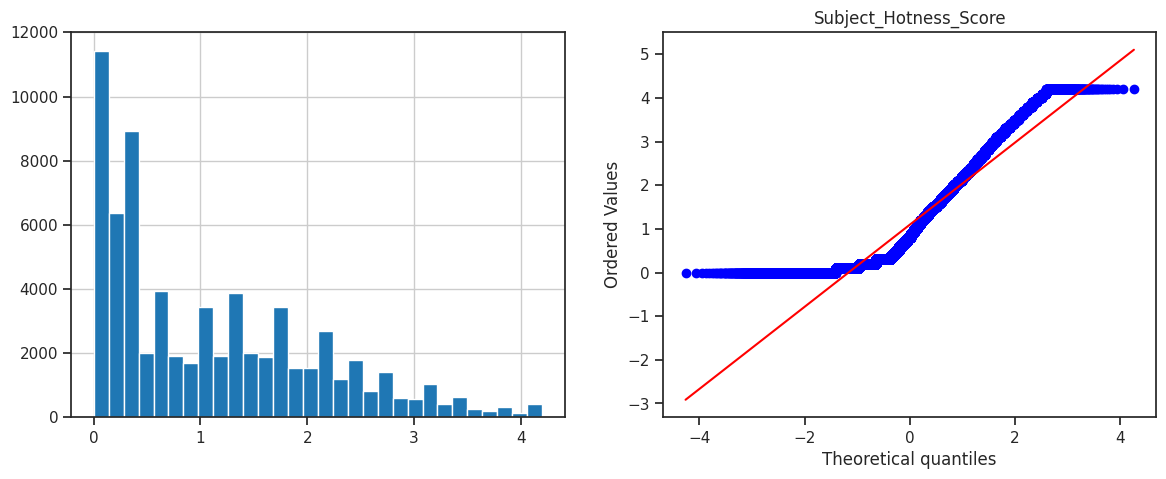

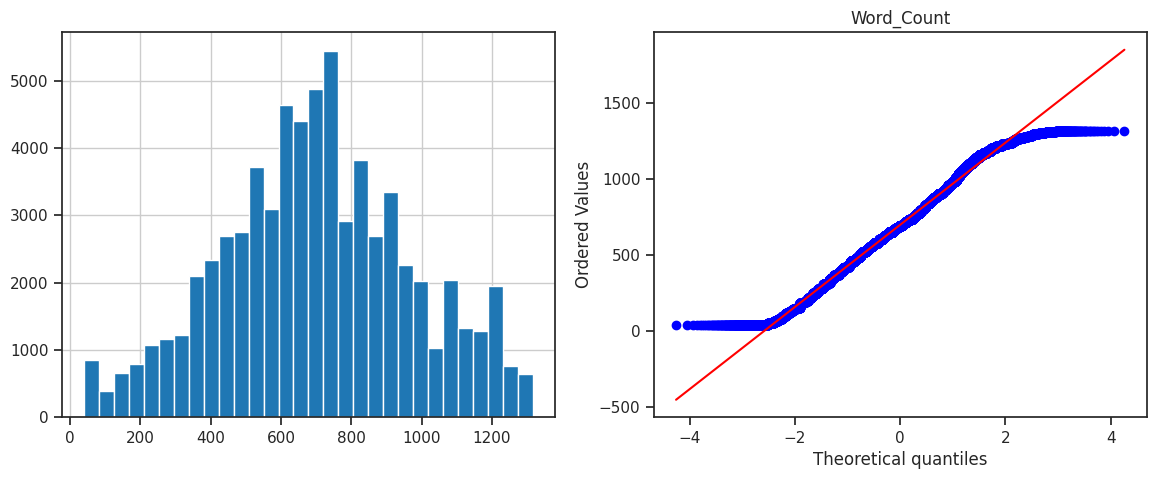

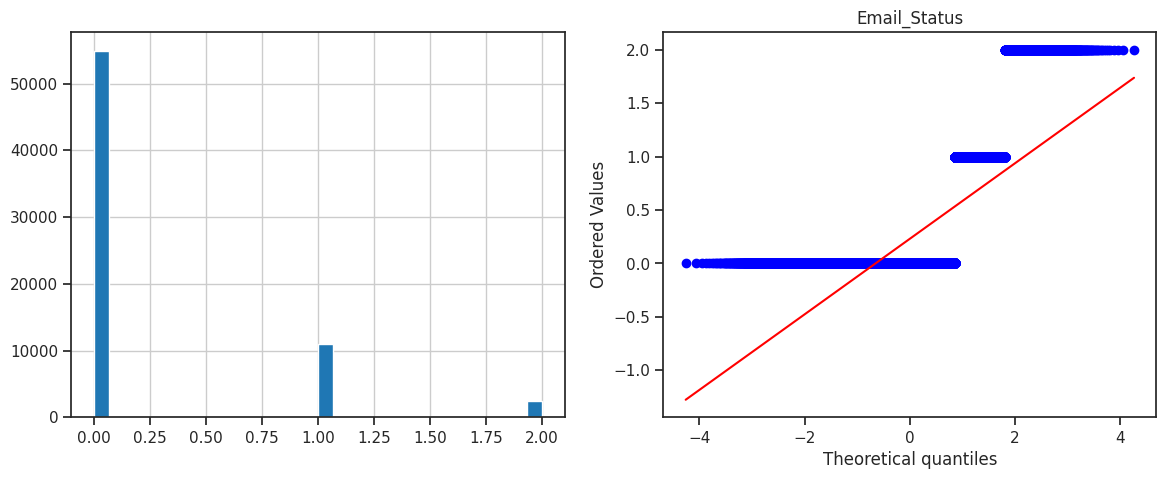

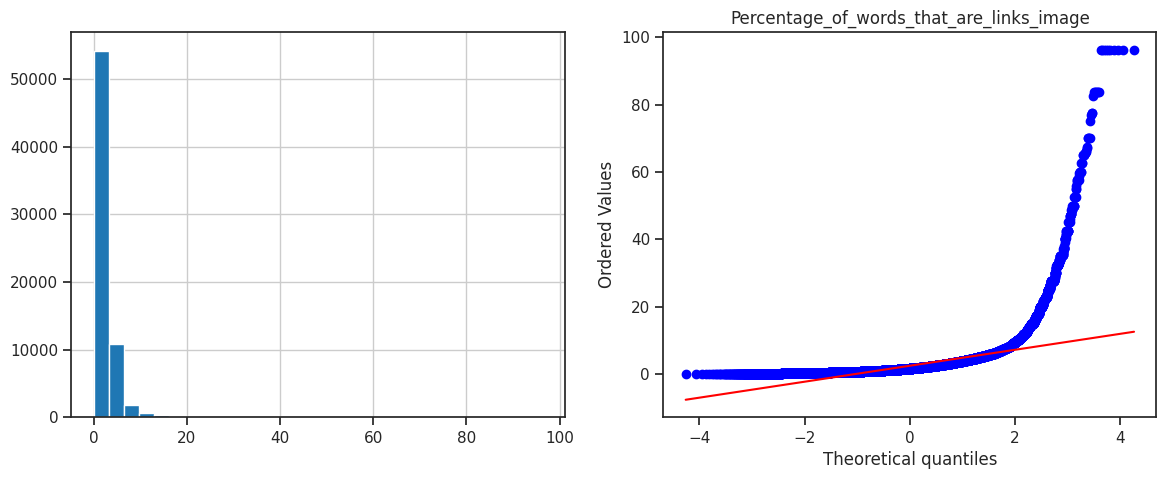

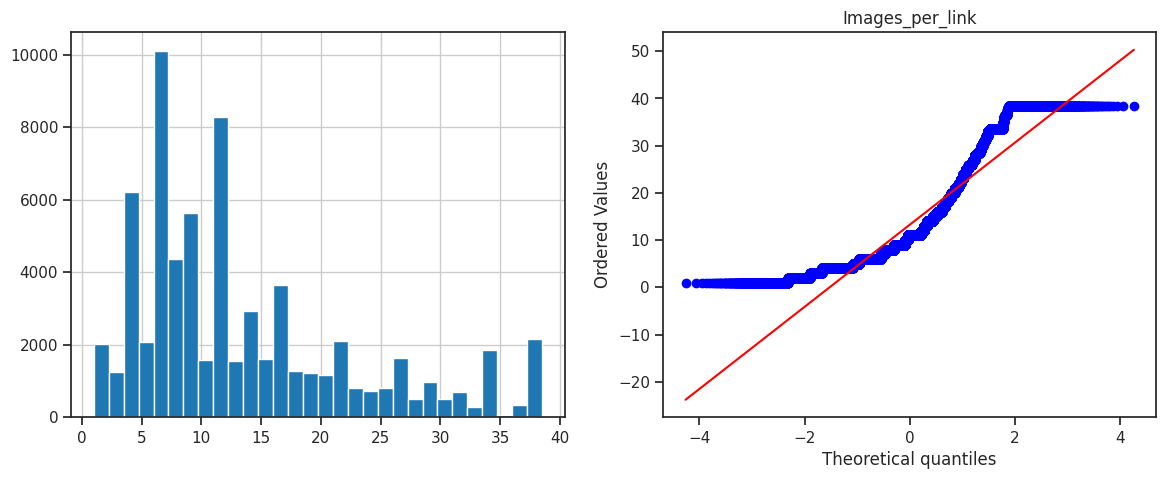

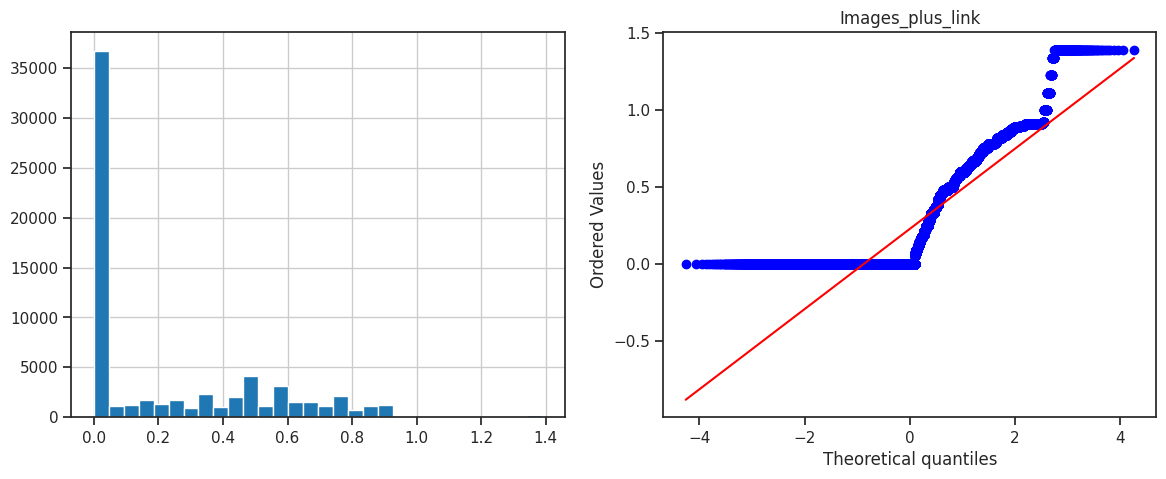

In [ ]:
#vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

In [ ]:
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count']:
  df_removed[col]=np.sqrt(df_removed[col])

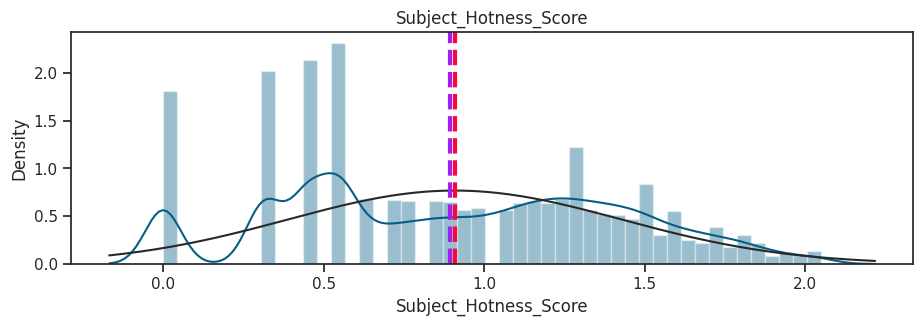

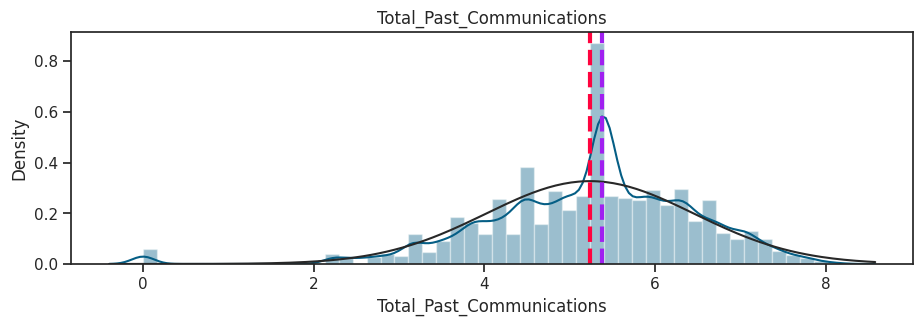

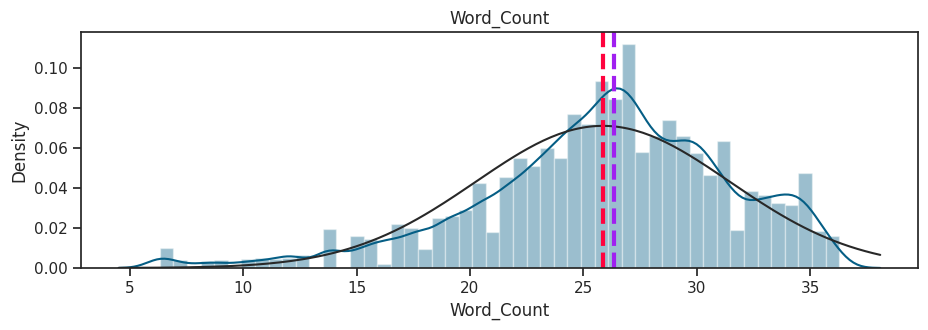

In [ ]:
for i,col in enumerate(['Subject_Hotness_Score','Total_Past_Communications','Word_Count']) :
    plt.figure(figsize = (18,18))
    plt.subplot(6,2,i+1);
    sns.distplot(df_removed[col], color = '#055E85', fit = norm);
    feature = df_removed[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

From the features, since some of them where having categorial feature therefore did not required transformation, for three features I have applied square root transformation to change it into gaussian normal distribution.

### 6. Data Scaling

In [ ]:
# Scaling your data
# Checking the data
df_removed.head()

,Email_Type,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Email_Campaign_Type_3,Percentage_of_words_that_are_links_image,Images_per_link,Images_plus_link
0,1,1.48,5.74,20.98,0,False,False,False,False,False,True,False,False,1.82,8.00,0.00
1,2,1.45,3.87,22.45,0,True,False,False,False,False,False,False,False,0.99,5.00,0.00
2,2,0.32,6.00,31.02,1,True,False,True,False,False,False,False,True,0.52,5.00,0.00
3,1,1.73,5.00,24.70,0,True,False,False,False,False,True,False,False,2.62,16.00,0.00
4,1,0.00,4.24,30.77,0,True,False,False,True,False,False,False,True,0.42,4.00,0.00


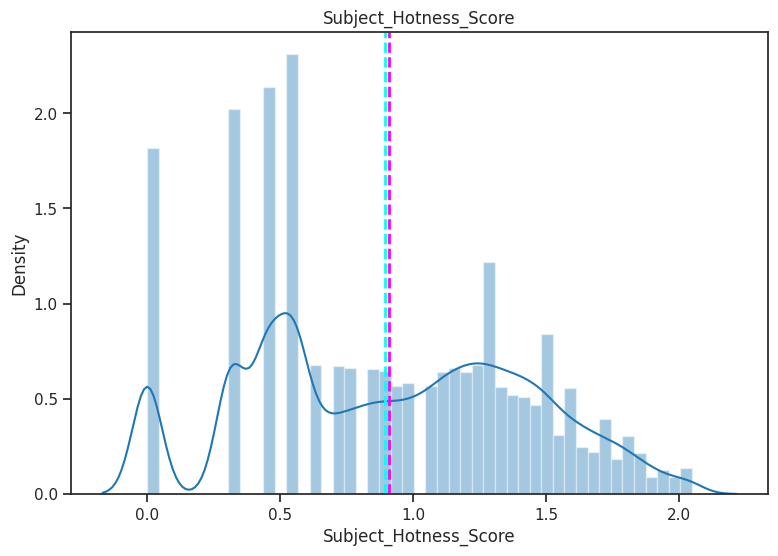

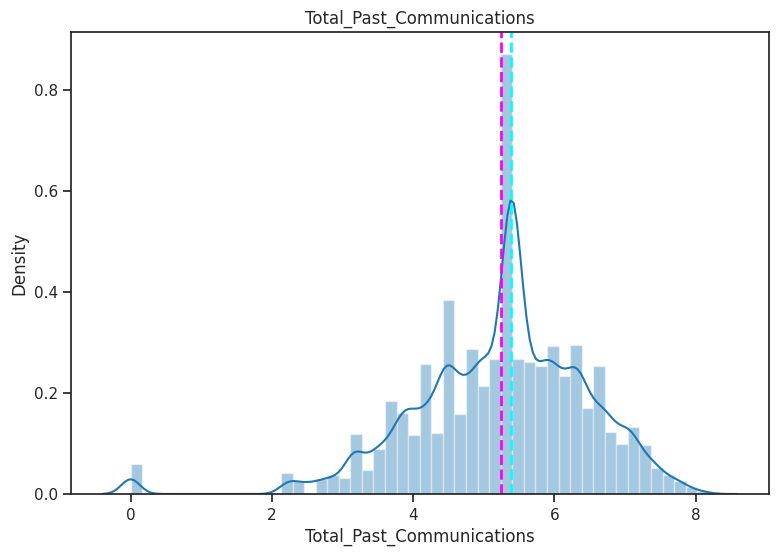

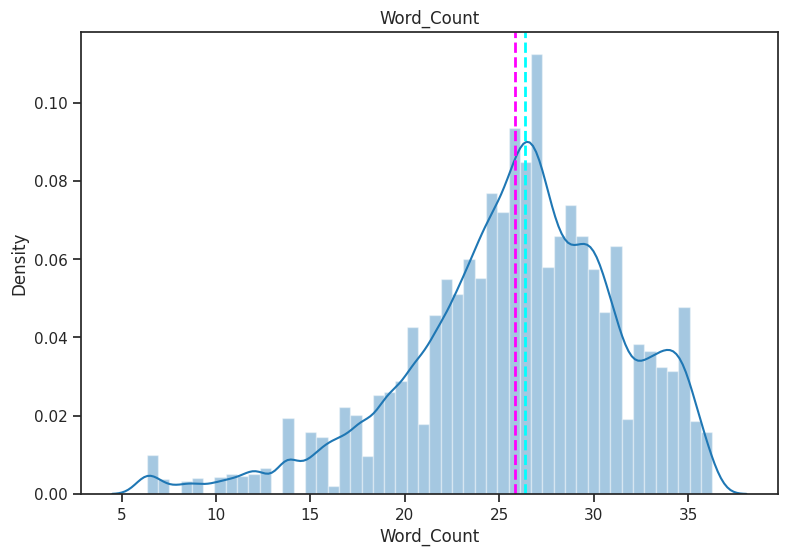

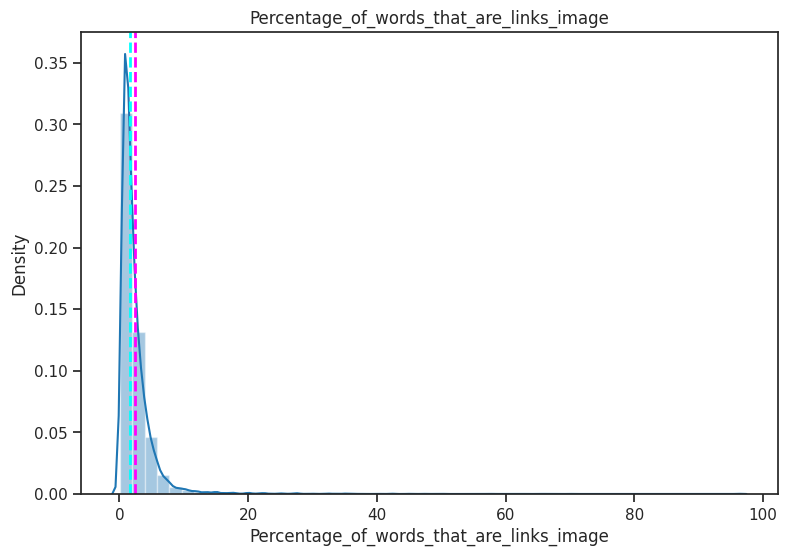

In [ ]:

# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

In [ ]:
#standard scaler
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  df_removed[col] = StandardScaler().fit_transform(df_removed[col].values.reshape(-1, 1))

In [ ]:
df_removed.head()

,Email_Type,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Email_Campaign_Type_3,Percentage_of_words_that_are_links_image,Images_per_link,Images_plus_link
0,1,1.11,0.41,-0.87,0,False,False,False,False,False,True,False,False,-0.18,8.00,0.00
1,2,1.04,-1.12,-0.61,0,True,False,False,False,False,False,False,False,-0.41,5.00,0.00
2,2,-1.14,0.62,0.92,1,True,False,True,False,False,False,False,True,-0.54,5.00,0.00
3,1,1.59,-0.20,-0.21,0,True,False,False,False,False,True,False,False,0.04,16.00,0.00
4,1,-1.75,-0.82,0.88,0,True,False,False,True,False,False,False,True,-0.57,4.00,0.00


##### Which method have you used to scale you data and why?

Since all of them has almost normal distribution, hence applied standard scaler to scale the features.

When we are using an algorithm that assumes your features have a similar range, we should use feature scaling.

If the ranges of features differ much then we should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then we can leave them as it's. However, we should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. This can lead to problems such as the nearest neighbor search becoming less effective, as the distances between points become much larger. Dimensionality reduction can help to reduce the curse of dimensionality by reducing the number of dimensions in the data.

Finally, dimensionality reduction can also be useful for visualizing high-dimensional data. It can be difficult to visualize data in more than three dimensions, so reducing the number of dimensions can make it easier to understand the patterns in the data.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not Applicable

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_removed.drop("Email_Status",axis=1),df_removed["Email_Status"],
    test_size = 0.2, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54682, 15)
Number transactions y_train dataset:  (54682,)
Number transactions X_test dataset:  (13671, 15)
Number transactions y_test dataset:  (13671,)


##### What data splitting ratio have you used and why?

In this case I have used 80:20 split as splitting in any ratio 80/20 or 70/30 deosnot affect unless there is less values in dataset. However, there are two competing concerns: with less training data, parameter estimates have greater variance. With less testing data, performance statistic will have greater variance. it is best to divide data such that neither the variance in the training set nor the variance in the test set is too high.

Example : If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

### 9. Handling Imbalanced Dataset

In [ ]:
df['Email_Status'].value_counts()

Email_Status
0    54941
1    11039
2     2373
Name: count, dtype: int64

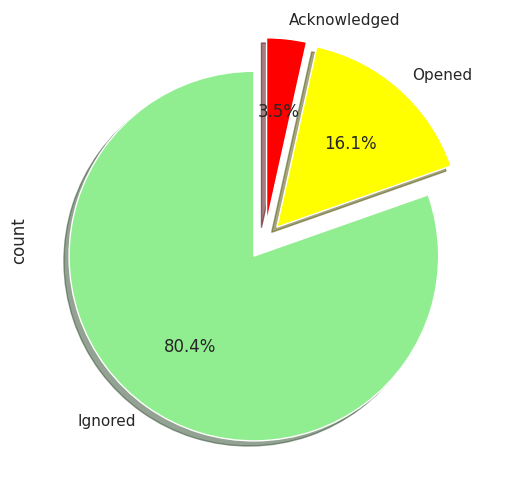

In [ ]:
# Dependant Variable Column Visualization
df['Email_Status'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Ignored','Opened','Acknowledged'],
                               colors=['lightgreen','yellow','red'],
                               explode=[0.1,0.1,0.1]
                              );

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 80:16:4. So, during model creating it's obvious that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [ ]:
#SMOTE
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (131817, 15)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 15)
Number transactions y_test dataset:  (13671,)


Class=0, n=43939 (33.333%)
Class=1, n=43939 (33.333%)
Class=2, n=43939 (33.333%)


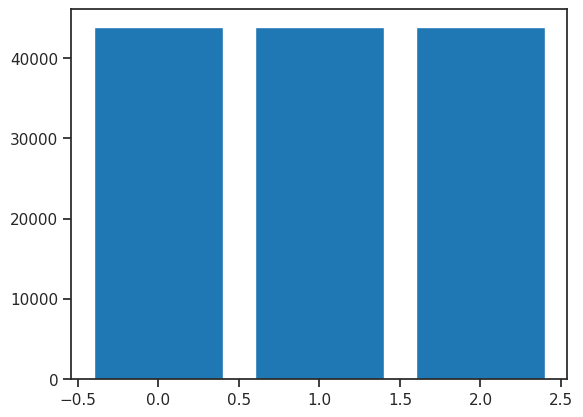

In [ ]:
#visualization of resampled data
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 80:16:4 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

## ***7. ML Model Implementation***

### ML Model - 1 Implementing Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
# Checking the coefficients
lr.coef_

array([[ 0.57729998,  0.27311197,  0.02082546,  0.44902444, -0.4115366 ,
        -0.3495712 , -0.08869606, -0.21190412, -0.20717452, -0.22857769,
        -0.24282885, -0.92518506,  0.03230613,  0.00307475, -0.01224813],
       [-0.19197412,  0.10567499,  0.01332528, -0.2037609 , -0.08194157,
        -0.03520866,  0.07667943, -0.06305209, -0.06089011, -0.0141963 ,
        -0.04948603,  0.36838087,  0.00884047, -0.01179315,  0.12592004],
       [-0.38532586, -0.37878696, -0.03415074, -0.24526354,  0.49347816,
         0.38477986,  0.01201662,  0.27495621,  0.26806463,  0.24277399,
         0.29231488,  0.55680419, -0.04114661,  0.0087184 , -0.11367191]])

* coef_ attribute represents the coefficients (also known as weights or parameters) of the linear equation that is used to predict the target variable. The coefficients represent the impact that each input feature has on the target variable.

In [ ]:
# Checking the intercept value
lr.intercept_

array([ 0.1664194 ,  0.37749053, -0.54390993])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability = lr.predict_proba(X_train)
test_probability = lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_pred_train,y_train)
test_accuracy = accuracy_score(y_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.5205550118725203
The accuracy on test data is  0.6061005047180162


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[29695  6003  8241]
 [14534 11859 17546]
 [ 8949  7926 27064]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

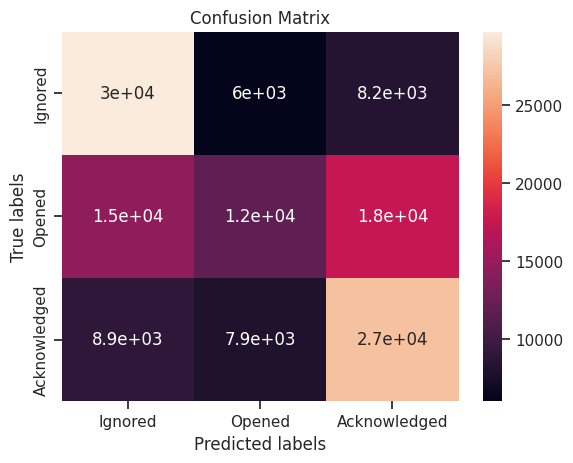

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7493 1557 1952]
 [ 828  571  830]
 [ 126   92  222]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

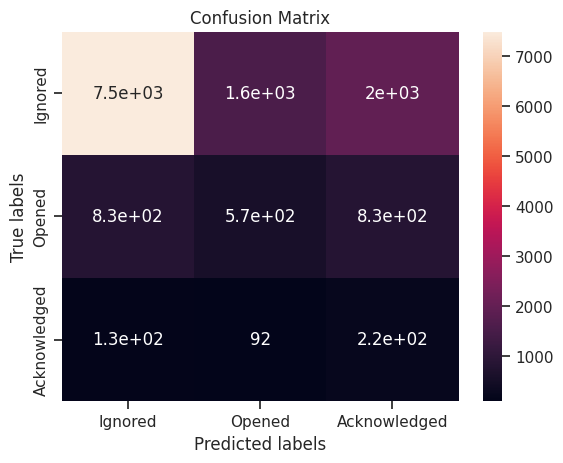

In [ ]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* 7324 = the number of instances that were predicted as class Ignored and are actually class Ignored
* 1663 = the number of instances that were predicted as class Ignored and are actually class Opened
* 2015 = the number of instances that were predicted as class Ignored and are actually class Acknowledged
* 845 = the number of instances that were predicted as class Opened and are actually class Ignored
* 681 = the number of instances that were predicted as class Opened and are actually class Opened
* 703 = the number of instances that were predicted as class Opened and are actually class Acknowledged
* 125 = the number of instances that were predicted as class Acknowledged and are actually class Ignored
* 106 = the number of instances that were predicted as class Acknowledged and are actually class Opened
* 209 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged

⚡
* The roc_auc_score function expects binary labels as the first argument and when passed multiclass labels, the function roc_auc_score can't handle multiclass labels, so should use the roc_auc_score for multiclass classification, for example you could use the roc_auc_ovr or roc_auc_ovo from the sklearn.metrics library.

* The roc_auc_ovr computes the AUC of ROC for multi-class classification by treating each label as a binary classification problem while roc_auc_ovo computes the AUC of ROC for multi-class classification by treating each class as a binary classification problem with one class as the positive class and the rest as negative classes.

In [ ]:
#train
#printing classification report
print(metrics.classification_report(y_pred_train, y_train))
print(" ")


              precision    recall  f1-score   support

           0       0.68      0.56      0.61     53178
           1       0.27      0.46      0.34     25788
           2       0.62      0.51      0.56     52851

    accuracy                           0.52    131817
   macro avg       0.52      0.51      0.50    131817
weighted avg       0.57      0.52      0.54    131817

 


I used Logistic regression algorithm to create the model. As I got not so good result.

For training dataset, I found precision of 66% and recall of 58% and f1-score of 61% for ignored emails. For class 2 i.e., email opened got precision of 31% and recall of 46% and f1-score of 37% and for class 3 i.e., email acknowledged got precision of 62% and recall of 52% and f1-score of 57% Accuracy is 53% and average precision, recall & f1_score are 53%, 52% and 54% respectively with a roc auc score of 71%.

For test dataset, I found precision of 67% and recall of 88% and f1-score of 76% for ignored emails. For class 2 i.e., email opened got precision of 31% and recall of 28% and f1-score of 29% and for class 3 i.e., email acknowledged got precision of 47% and recall of 7% and f1-score of 12% Accuracy is 60% and average precision, recall & f1_score are 48%, 41% and 39% respectively with a roc auc score of 69%.

For test :

* 7324 = the number of instances that were predicted as class Ignored and are actually class Ignored
* 1663 = the number of instances that were predicted as class Ignored and are actually class Opened
* 2015 = the number of instances that were predicted as class Ignored and are actually class Acknowledged
* 845 = the number of instances that were predicted as class Opened and are actually class Ignored
* 681 = the number of instances that were predicted as class Opened and are actually class Opened
* 703 = the number of instances that were predicted as class Opened and are actually class Acknowledged
* 125 = the number of instances that were predicted as class Acknowledged and are actually class Ignored
* 106 = the number of instances that were predicted as class Acknowledged and are actually class Opened
* 209 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(fit_intercept=True, max_iter=10000,
            class_weight='balanced',multi_class='multinomial')
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.000000 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability2 = grid_result.predict_proba(X_train)
test_probability2 = grid_result.predict_proba(X_test)

In [ ]:
# Predict on the model
# Get the predicted classes
y_pred_train2 = grid_result.predict(X_train)
y_pred2 = grid_result.predict(X_test)

In [ ]:
#train
#printing classification report
print(metrics.classification_report(y_pred_train2, y_train))
print(" ")


              precision    recall  f1-score   support

           0       0.68      0.56      0.61     53209
           1       0.27      0.46      0.34     25764
           2       0.62      0.51      0.56     52844

    accuracy                           0.52    131817
   macro avg       0.52      0.51      0.50    131817
weighted avg       0.57      0.52      0.54    131817

 


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 66% and recall of 57% and f1-score of 61% for ignored emails. For class 2 i.e., email opened got precision of 30% and recall of 46% and f1-score of 36% and for class 3 i.e., email acknowledged got precision of 63% and recall of 52% and f1-score of 57% Accuracy is 53% and average precision, recall & f1_score are 53%, 52% and 52% respectively with a roc auc score of 71%.

For test dataset, I found precision of 67% and recall of 88% and f1-score of 76% for ignored emails. For class 2 i.e., email opened got precision of 30% and recall of 28% and f1-score of 29% and for class 3 i.e., email acknowledged got precision of 48% and recall of 7% and f1-score of 12% Accuracy is 60% and average precision, recall & f1_score are 48%, 41% and 39% respectively with a roc auc score of 69%.

### ML Model - 2 Implementing Random Forest Classifier

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability3 = rf_model.predict_proba(X_train)
test_probability3 = rf_model.predict_proba(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train3)
test_accuracy = accuracy_score(y_test,y_pred3)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9997648254777457
The accuracy on test dataset is 0.7428132543339917


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[43930     8     1]
 [    9 43925     5]
 [    3     5 43931]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

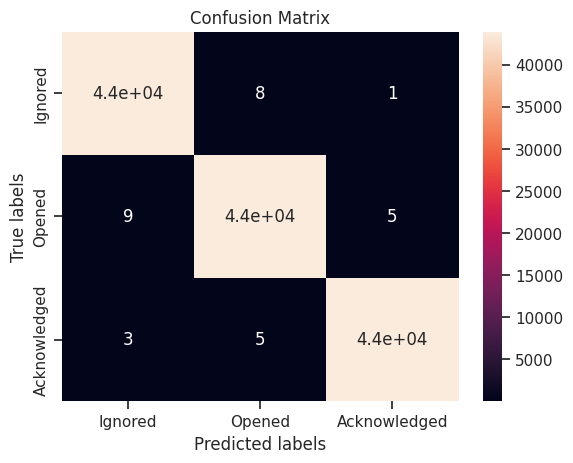

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_train, y_pred_train3)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[9362 1326  314]
 [1277  732  220]
 [ 221  158   61]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

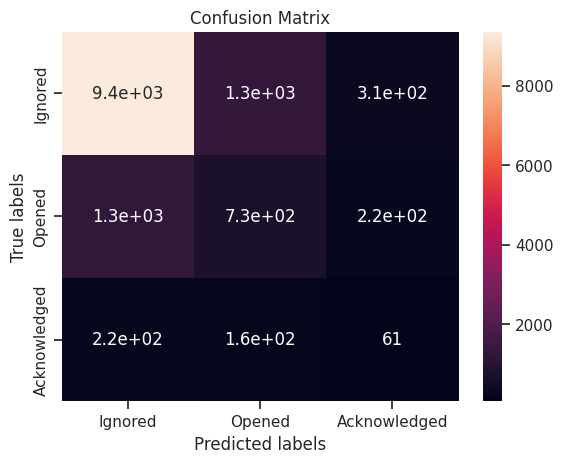

In [ ]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_test, y_pred3)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* 9452 = the number of instances that were predicted as class Ignored and are actually class Ignored
* 1235 = the number of instances that were predicted as class Ignored and are actually class Opened
* 315 = the number of instances that were predicted as class Ignored and are actually class Acknowledged
* 1333 = the number of instances that were predicted as class Opened and are actually class Ignored
* 691 = the number of instances that were predicted as class Opened and are actually class Opened
* 205 = the number of instances that were predicted as class Opened and are actually class Acknowledged
* 214 = the number of instances that were predicted as class Acknowledged and are actually class Ignored
* 166 = the number of instances that were predicted as class Acknowledged and are actually class Opened
* 60 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged

In [ ]:
#result train
print(metrics.classification_report(y_pred_train3, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability3, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43942
           1       1.00      1.00      1.00     43938
           2       1.00      1.00      1.00     43937

    accuracy                           1.00    131817
   macro avg       1.00      1.00      1.00    131817
weighted avg       1.00      1.00      1.00    131817

 
roc_auc_score
0.9999998560923067


In [ ]:
#test result
print(metrics.classification_report(y_pred3, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability3, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     10860
           1       0.33      0.33      0.33      2216
           2       0.14      0.10      0.12       595

    accuracy                           0.74     13671
   macro avg       0.44      0.43      0.43     13671
weighted avg       0.74      0.74      0.74     13671

 
roc_auc_score
0.71935857073764


I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, I found 100% for everything.

For test dataset, I found precision of 86% and recall of 86% and f1-score of 86% for ignored emails. For class 2 i.e., email opened got precision of 31% and recall of 33% and f1-score of 32% and for class 3 i.e., email acknowledged got precision of 14% and recall of 10% and f1-score of 12% Accuracy is 75% and average precision, recall & f1_score are 44%, 43% and 43% respectively with a roc auc score of 71%.

For test:

* 9452 = the number of instances that were predicted as class Ignored and are actually class Ignored
* 1235 = the number of instances that were predicted as class Ignored and are actually class Opened
* 315 = the number of instances that were predicted as class Ignored and are actually class Acknowledged
* 1333 = the number of instances that were predicted as class Opened and are actually class Ignored
* 691 = the number of instances that were predicted as class Opened and are actually class Opened
* 205 = the number of instances that were predicted as class Opened and are actually class Acknowledged
* 214 = the number of instances that were predicted as class Acknowledged and are actually class Ignored
* 166 = the number of instances that were predicted as class Acknowledged and are actually class Opened
* 60 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged

In [ ]:
#finding important feature
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#sorting in descending order
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
2,Total_Past_Communications,0.19
1,Subject_Hotness_Score,0.16
3,Word_Count,0.16
12,Percentage_of_words_that_are_links_image,0.15
13,Images_per_link,0.12
14,Images_plus_link,0.07
11,Email_Campaign_Type_3,0.04
0,Email_Type,0.02
4,Time_Email_sent_Category_2,0.02
5,Time_Email_sent_Category_3,0.02


In [ ]:
#finding importance
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

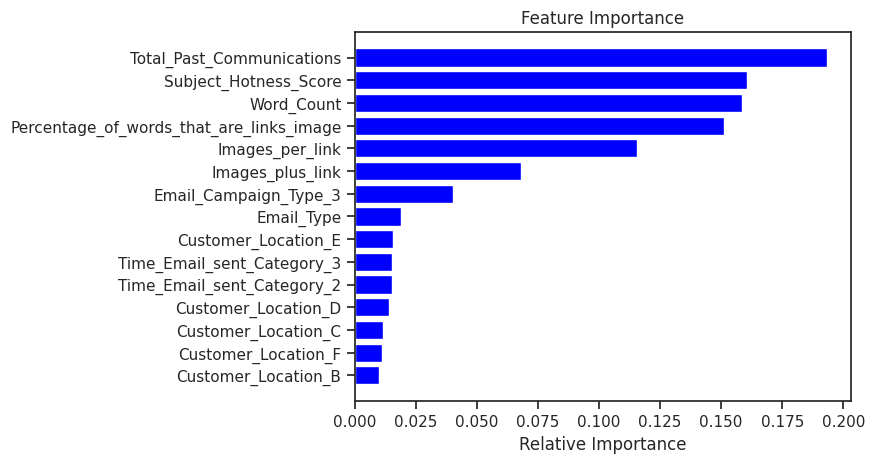

In [ ]:
#plotting
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.3s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1', verbose=2)

In [ ]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)


In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability4 = rf_grid.predict_proba(X_train)
test_probability4 = rf_grid.predict_proba(X_test)

In [ ]:
#result train
print(metrics.classification_report(y_pred_train4, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability4, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68     54605
           1       0.19      0.46      0.26     17689
           2       0.72      0.53      0.61     59523

    accuracy                           0.56    131817
   macro avg       0.56      0.54      0.52    131817
weighted avg       0.67      0.56      0.59    131817

 
roc_auc_score
0.7469503758860577


In [ ]:
#test result
print(metrics.classification_report(y_pred4, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability4, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      9362
           1       0.17      0.27      0.21      1399
           2       0.66      0.10      0.17      2910

    accuracy                           0.66     13671
   macro avg       0.53      0.42      0.40     13671
weighted avg       0.68      0.66      0.62     13671

 
roc_auc_score
0.7547635307705751


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 77% and recall of 57% and f1-score of 66% for ignored emails. For class 2 i.e., email opened got precision of 21% and recall of 45% and f1-score of 28% and for class 3 i.e., email acknowledged got precision of 64% and recall of 54% and f1-score of 59% Accuracy is 54% and average precision, recall & f1_score are 54%, 52% and 51% respectively with a roc auc score of 74%.

For test dataset, I found precision of 77% and recall of 88% and f1-score of 83% for ignored emails. For class 2 i.e., email opened got precision of 19% and recall of 27% and f1-score of 22% and for class 3 i.e., email acknowledged got precision of 57% and recall of 10% and f1-score of 17% Accuracy is 67% and average precision, recall & f1_score are 51%, 42% and 41% respectively with a roc auc score of 74%.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:
* **Accuracy**: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

* **Precision**: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

* **Recall**: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

* **F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

* **ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

In summary, the Random Forest Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 Implementing XgBoost Classifier

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability5 = xg_models.predict_proba(X_train)
test_probability5 = xg_models.predict_proba(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_pred_train5)
test_accuracy = accuracy_score(y_test,y_pred5)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8020816738356965
The accuracy on test dataset is 0.7779240728549485


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[41093  1806  1040]
 [ 7421 26958  9560]
 [ 1894  4368 37677]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

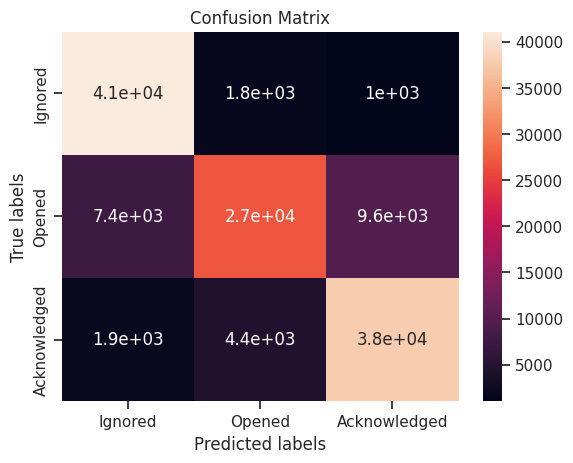

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_train, y_pred_train5)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[10067   630   305]
 [ 1447   479   303]
 [  234   117    89]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

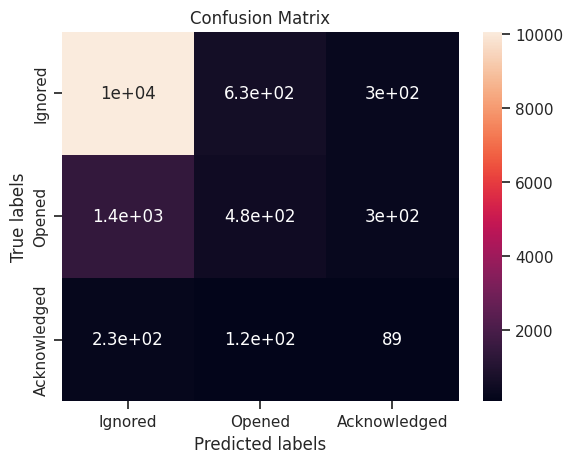

In [ ]:
# Get the confusion matrix for test

labels = ['Ignored', 'Opened','Acknowledged']
cm = confusion_matrix(y_test, y_pred5)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* 10271 = the number of instances that were predicted as class Ignored and are actually class Ignored
* 500 = the number of instances that were predicted as class Ignored and are actually class Opened
* 231 = the number of instances that were predicted as class Ignored and are actually class Acknowledged
* 1595 = the number of instances that were predicted as class Opened and are actually class Ignored
* 427 = the number of instances that were predicted as class Opened and are actually class Opened
* 207 = the number of instances that were predicted as class Opened and are actually class Acknowledged
* 275 = the number of instances that were predicted as class Acknowledged and are actually class Ignored
* 106 = the number of instances that were predicted as class Acknowledged and are actually class Opened
* 59 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged

In [ ]:
#result train
print(metrics.classification_report(y_pred_train5, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability5, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     50408
           1       0.61      0.81      0.70     33132
           2       0.86      0.78      0.82     48277

    accuracy                           0.80    131817
   macro avg       0.80      0.80      0.80    131817
weighted avg       0.83      0.80      0.81    131817

 
roc_auc_score
0.9324147597702094


In [ ]:
#test result
print(metrics.classification_report(y_pred5, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability5, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11748
           1       0.21      0.39      0.28      1226
           2       0.20      0.13      0.16       697

    accuracy                           0.78     13671
   macro avg       0.44      0.46      0.44     13671
weighted avg       0.82      0.78      0.79     13671

 
roc_auc_score
0.7444939751841272


For training dataset, I found precision of 95% and recall of 85% and f1-score of 90% for ignored emails. For class 2 i.e., email opened got precision of 62% and recall of 82% and f1-score of 70% and for class 3 i.e., email acknowledged got precision of 87% and recall of 77% and f1-score of 82% Accuracy is 81% and average precision, recall & f1_score are 81%, 81% and 81% respectively with a roc auc score of 93%.

For test dataset, I found precision of 93% and recall of 85% and f1-score of 89% for ignored emails. For class 2 i.e., email opened got precision of 19% and recall of 41% and f1-score of 26% and for class 3 i.e., email acknowledged got precision of 13% and recall of 12% and f1-score of 13% Accuracy is 79% and average precision, recall & f1_score are 42%, 46% and 43% respectively with a roc auc score of 75%.

For test:

* 10271 = the number of instances that were predicted as class Ignored and are actually class Ignored
* 500 = the number of instances that were predicted as class Ignored and are actually class Opened
* 231 = the number of instances that were predicted as class Ignored and are actually class Acknowledged
* 1595 = the number of instances that were predicted as class Opened and are actually class Ignored
* 427 = the number of instances that were predicted as class Opened and are actually class Opened
* 207 = the number of instances that were predicted as class Opened and are actually class Acknowledged
* 275 = the number of instances that were predicted as class Acknowledged and are actually class Ignored
* 106 = the number of instances that were predicted as class Acknowledged and are actually class Opened
* 59 = the number of instances that were predicted as class Acknowledged and are actually class Acknowledged

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_sam

In [ ]:
#best parameter
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6 = xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_probability6 = xg_grid1.predict_proba(X_train)
test_probability6 = xg_grid1.predict_proba(X_test)

In [ ]:
#result train
print(metrics.classification_report(y_pred_train6, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability6, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     48188
           1       0.44      0.58      0.50     32705
           2       0.74      0.64      0.68     50924

    accuracy                           0.66    131817
   macro avg       0.66      0.65      0.65    131817
weighted avg       0.69      0.66      0.67    131817

 
roc_auc_score
0.841416519653908


In [ ]:
#test result
print(metrics.classification_report(y_pred6, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability6, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      9958
           1       0.31      0.31      0.31      2244
           2       0.40      0.12      0.18      1469

    accuracy                           0.71     13671
   macro avg       0.50      0.44      0.44     13671
weighted avg       0.68      0.71      0.68     13671

 
roc_auc_score
0.7505777890279705


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 77% and recall of 69% and f1-score of 73% for ignored emails. For class 2 i.e., email opened got precision of 33% and recall of 55% and f1-score of 42% and for class 3 i.e., email acknowledged got precision of 74% and recall of 58% and f1-score of 65% Accuracy is 62% and average precision, recall & f1_score are 62%, 61% and 60% respectively with a roc auc score of 80%.

For test dataset, I found precision of 77% and recall of 89% and f1-score of 82% for ignored emails. For class 2 i.e., email opened got precision of 28% and recall of 31% and f1-score of 30% and for class 3 i.e., email acknowledged got precision of 48% and recall of 10% and f1-score of 16% Accuracy is 68% and average precision, recall & f1_score are 51%, 43% and 43% respectively with a roc auc score of 74%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When evaluating the effectiveness of an email campaign in a classification model, the following evaluation metrics would be considered for a positive business impact:

* **Precision**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify individuals who are likely to engage with the campaign. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions and is effectively identifying individuals who are likely to engage with the campaign.

* **Recall**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all actual positive instances (emails that were opened and resulted in a desired action). In a business setting, this would indicate the model's ability to identify all individuals who engaged with the campaign. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any individuals who engaged with the campaign.

* **F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in identifying individuals who are likely to engage with the campaign while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is effectively identifying individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign.

* **ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive (engaged with the campaign) or negative (did not engage with the campaign). A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify individuals as likely to engage with the campaign or not.

The evaluation metrics that would be considered for a positive business impact of an email campaign effectiveness in a classification model are **precision, recall** which combine to provide F1 score. These metrics would indicate the model's ability to identify individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign, and correctly classify instances as positive or negative.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. As, for greater accuracy I used Random Forest, XgBoost kind of ensembel r=techniques. So, I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.

**Hypertuned Random Forest Classifier**⚡

---

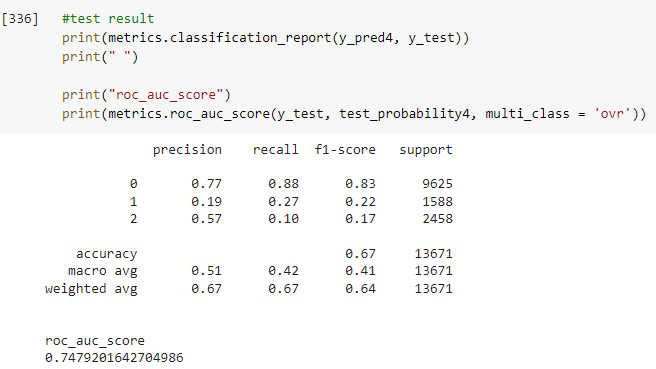

---

**Hypertuned XgBoost Classifier**⚡

---
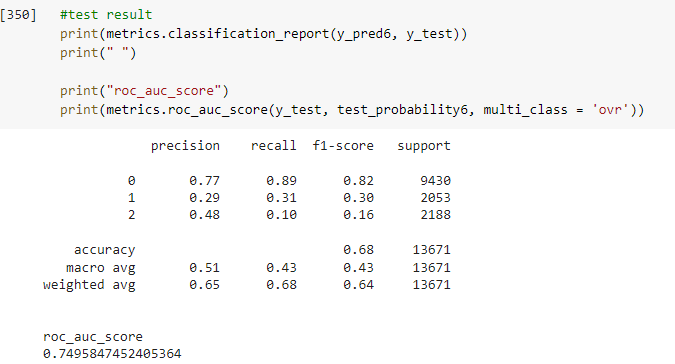

From the above snap shot, we can clearly see that for XGBoost has a improved score of f1_score over random forest. the accuracy and roc auc score is also improved for xg boost. The recall, precision and f1_score it's low and even in average scores of precision and f1_score is low. In case of xgboost it's higher than that of random forest. Plus

So, I have chosen XGBoost as the final prediction model which should be deployed for real user interaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.TreeExplainer(xg_models)
shap_values = explainer(X_test)

In [ ]:
# shap interaction
shap_interaction_values = explainer.shap_interaction_values(X_test)

Answer Here.

# **Conclusion**

* We can see from the customer location feature that, regardless of location, the percentage ratio of emails that are ignored, read, and acknowledged is somewhat comparable. It has an indirect impact on our goal variable as well. It would be preferable to disregard the idea that someone's location influences whether they read, acknowledge, or ignore our emails.

* According to the Email Campaign Type feature, Campaign Type 1 had a very high possibility of being viewed even though relatively few emails were sent. The majority of emails sent under email campaign type 2 were ignored. It appears that campaign 3 was successful because more emails were read and acknowledged even though fewer emails were sent during this campaign.

* Email classification cannot take into account the time the email was sent as a relevant element. Both the feature importance and this specific thing demonstrated it. Emails sent in category 2 during the middle of the day will undoubtedly receive more reading and acknowledgment than those sent in categories 1 and 2 during the day.

* When we look at all of the prior conversations, we can see that the more emails there are, the more emails are read and acknowledged. Making a relationship with your customers is all that is required here.

* An email has a tendency to be disregarded the more words it contains. Emails that are too long are ignored.

* Emails that were ignored contained more pictures.

* With the exception of Word Count, practically all continuous variables had outliers. After analysis, it was discovered that outliers account for more than 5% of the minority data and will affect the results in either direction, therefore it was preferable to leave them in.

* Although SMOTE appears to have performed much better, information loss is possible.

* With such unbalanced data and outliers, the XGBoost algorithm performed as well as it could, followed by the Random Forest Hyperparameter Tuned model with an F1 Score of 0.68 on the test set.